In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
I_Corintios_1 = "Paul called to be an apostle of Jesus Christ through the will of God, and Sosthenes our brother,To the church of God which is at Corinth, to them that are sanctified in Christ Jesus, called to be saints, with all that in every place call on the name of Jesus Christ our Lord, both their' and our':Grace be to you, and peace, from God our Father, and from the Lord Jesus Christ.I thank my God always on your behalf, for the grace of God which is given you by Jesus Christ;That in every thing you are enriched by him, in all utterance, and in all knowledge;Even as the testimony of Christ was confirmed in you:So that you come behind in no gift; waiting for the coming of our Lord Jesus Christ:Who shall also confirm you to the end, that you may be blameless in the day of our Lord Jesus Christ.God is faithful, by whom you were called to the fellowship of his Son Jesus Christ our Lord.Now I beseech you, brothers, by the name of our Lord Jesus Christ, that you all speak the same thing, and that there be no divisions among you; but that you be perfectly joined together in the same mind and in the same judgment.For it has been declared to me of you, my brothers, by them which are of the house of Chloe, that there are contentions among you.Now this I say, that every one of you said, I am of Paul; and I of Apollos; and I of Cephas; and I of Christ.Is Christ divided? was Paul crucified for you? or were you baptized in the name of Paul?I thank God that I baptized none of you, but Crispus and Gaius;Lest any should say that I had baptized in my own name.And I baptized also the household of Stephanas: besides, I know not whether I baptized any other.For Christ sent me not to baptize, but to preach the gospel: not with wisdom of words, lest the cross of Christ should be made of none effect.For the preaching of the cross is to them that perish foolishness; but to us which are saved it is the power of God.For it is written, I will destroy the wisdom of the wise, and will bring to nothing the understanding of the prudent.Where is the wise? where is the scribe? where is the disputer of this world? has not God made foolish the wisdom of this world?For after that in the wisdom of God the world by wisdom knew not God, it pleased God by the foolishness of preaching to save them that believe.For the Jews require a sign, and the Greeks seek after wisdom:But we preach Christ crucified, to the Jews a stumbling block, and to the Greeks foolishness;But to them which are called, both Jews and Greeks, Christ the power of God, and the wisdom of God.Because the foolishness of God is wiser than men; and the weakness of God is stronger than men.For you see your calling, brothers, how that not many wise men after the flesh, not many mighty, not many noble, are called:But God has chosen the foolish things of the world to confound the wise; and God has chosen the weak things of the world to confound the things which are mighty;And base things of the world, and things which are despised, has God chosen, yes, and things which are not, to bring to nothing things that are:That no flesh should glory in his presence.But of him are you in Christ Jesus, who of God is made to us wisdom, and righteousness, and sanctification, and redemption:That, according as it is written, He that glories, let him glory in the Lord.".lower()

In [6]:
I_Corintios_2 = "And I, brothers, when I came to you, came not with excellency of speech or of wisdom, declaring to you the testimony of God.For I determined not to know any thing among you, save Jesus Christ, and him crucified.And I was with you in weakness, and in fear, and in much trembling.And my speech and my preaching was not with enticing words of man' wisdom, but in demonstration of the Spirit and of power:That your faith should not stand in the wisdom of men, but in the power of God.However, we speak wisdom among them that are perfect: yet not the wisdom of this world, nor of the princes of this world, that come to nothing:But we speak the wisdom of God in a mystery, even the hidden wisdom, which God ordained before the world to our glory:Which none of the princes of this world knew: for had they known it, they would not have crucified the Lord of glory.But as it is written, Eye has not seen, nor ear heard, neither have entered into the heart of man, the things which God has prepared for them that love him.But God has revealed them to us by his Spirit: for the Spirit searches all things, yes, the deep things of God.For what man knows the things of a man, save the spirit of man which is in him? even so the things of God knows no man, but the Spirit of God.Now we have received, not the spirit of the world, but the spirit which is of God; that we might know the things that are freely given to us of God.Which things also we speak, not in the words which man' wisdom teaches, but which the Holy Ghost teaches; comparing spiritual things with spiritual.But the natural man receives not the things of the Spirit of God: for they are foolishness to him: neither can he know them, because they are spiritually discerned.But he that is spiritual judges all things, yet he himself is judged of no man.For who has known the mind of the Lord, that he may instruct him? But we have the mind of Christ.".lower()

In [7]:
I_Corintios_3 = "And I, brothers, could not speak to you as to spiritual, but as to carnal, even as to babes in Christ.I have fed you with milk, and not with meat: for till now you were not able to bear it, neither yet now are you able.For you are yet carnal: for whereas there is among you envying, and strife, and divisions, are you not carnal, and walk as men?For while one said, I am of Paul; and another, I am of Apollos; are you not carnal?Who then is Paul, and who is Apollos, but ministers by whom you believed, even as the Lord gave to every man?I have planted, Apollos watered; but God gave the increase.So then neither is he that plants any thing, neither he that waters; but God that gives the increase.Now he that plants and he that waters are one: and every man shall receive his own reward according to his own labor.For we are laborers together with God: you are God' husbandry, you are God' building.According to the grace of God which is given to me, as a wise master builder, I have laid the foundation, and another builds thereon. But let every man take heed how he builds thereupon.For other foundation can no man lay than that is laid, which is Jesus Christ.Now if any man build on this foundation gold, silver, precious stones, wood, hay, stubble;Every man' work shall be made manifest: for the day shall declare it, because it shall be revealed by fire; and the fire shall try every man' work of what sort it is.If any man' work abide which he has built thereupon, he shall receive a reward.If any man' work shall be burned, he shall suffer loss: but he himself shall be saved; yet so as by fire.Know you not that you are the temple of God, and that the Spirit of God dwells in you?If any man defile the temple of God, him shall God destroy; for the temple of God is holy, which temple you are.Let no man deceive himself. If any man among you seems to be wise in this world, let him become a fool, that he may be wise.For the wisdom of this world is foolishness with God. For it is written, He takes the wise in their own craftiness.And again, The Lord knows the thoughts of the wise, that they are vain.Therefore let no man glory in men. For all things are your';Whether Paul, or Apollos, or Cephas, or the world, or life, or death, or things present, or things to come; all are your';And you are Christ'; and Christ is God'.".lower()

In [8]:
I_Corintios_4 = "Let a man so account of us, as of the ministers of Christ, and stewards of the mysteries of God.Moreover it is required in stewards, that a man be found faithful.But with me it is a very small thing that I should be judged of you, or of man' judgment: yes, I judge not my own self.For I know nothing by myself; yet am I not hereby justified: but he that judges me is the Lord.Therefore judge nothing before the time, until the Lord come, who both will bring to light the hidden things of darkness, and will make manifest the counsels of the hearts: and then shall every man have praise of God.And these things, brothers, I have in a figure transferred to myself and to Apollos for your sakes; that you might learn in us not to think of men above that which is written, that no one of you be puffed up for one against another.For who makes you to differ from another? and what have you that you did not receive? now if you did receive it, why do you glory, as if you had not received it?Now you are full, now you are rich, you have reigned as kings without us: and I would to God you did reign, that we also might reign with you.For I think that God has set forth us the apostles last, as it were appointed to death: for we are made a spectacle to the world, and to angels, and to men.We are fools for Christ' sake, but you are wise in Christ; we are weak, but you are strong; you are honorable, but we are despised.Even to this present hour we both hunger, and thirst, and are naked, and are buffeted, and have no certain dwelling place;And labor, working with our own hands: being reviled, we bless; being persecuted, we suffer it:Being defamed, we entreat: we are made as the filth of the world, and are the offscouring of all things to this day.I write not these things to shame you, but as my beloved sons I warn you.For though you have ten thousand instructors in Christ, yet have you not many fathers: for in Christ Jesus I have begotten you through the gospel.Why I beseech you, be you followers of me.For this cause have I sent to you Timotheus, who is my beloved son, and faithful in the Lord, who shall bring you into remembrance of my ways which be in Christ, as I teach every where in every church.Now some are puffed up, as though I would not come to you.But I will come to you shortly, if the Lord will, and will know, not the speech of them which are puffed up, but the power.For the kingdom of God is not in word, but in power.What will you? shall I come to you with a rod, or in love, and in the spirit of meekness?".lower()

In [9]:
I_Corintios_5 = "It is reported commonly that there is fornication among you, and such fornication as is not so much as named among the Gentiles, that one should have his father' wife.And you are puffed up, and have not rather mourned, that he that has done this deed might be taken away from among you.For I truly, as absent in body, but present in spirit, have judged already, as though I were present, concerning him that has so done this deed,In the name of our Lord Jesus Christ, when you are gathered together, and my spirit, with the power of our Lord Jesus Christ,To deliver such an one to Satan for the destruction of the flesh, that the spirit may be saved in the day of the Lord Jesus.Your glorying is not good. Know you not that a little leaven leavens the whole lump?Purge out therefore the old leaven, that you may be a new lump, as you are unleavened. For even Christ our passover is sacrificed for us:Therefore let us keep the feast, not with old leaven, neither with the leaven of malice and wickedness; but with the unleavened bread of sincerity and truth.I wrote to you in an letter not to company with fornicators:Yet not altogether with the fornicators of this world, or with the covetous, or extortionists, or with idolaters; for then must you needs go out of the world.But now I have written to you not to keep company, if any man that is called a brother be a fornicator, or covetous, or an idolater, or a reviler, or a drunkard, or an extortionist; with such an one no not to eat.For what have I to do to judge them also that are without? do not you judge them that are within?But them that are without God judges. Therefore put away from among yourselves that wicked person.".lower()

In [10]:
I_Corintios_6 = "Dare any of you, having a matter against another, go to law before the unjust, and not before the saints?Do you not know that the saints shall judge the world? and if the world shall be judged by you, are you unworthy to judge the smallest matters?Know you not that we shall judge angels? how much more things that pertain to this life?If then you have judgments of things pertaining to this life, set them to judge who are least esteemed in the church.I speak to your shame. Is it so, that there is not a wise man among you? no, not one that shall be able to judge between his brothers?But brother goes to law with brother, and that before the unbelievers.Now therefore there is utterly a fault among you, because you go to law one with another. Why do you not rather take wrong? why do you not rather suffer yourselves to be defrauded?No, you do wrong, and defraud, and that your brothers.Know you not that the unrighteous shall not inherit the kingdom of God? Be not deceived: neither fornicators, nor idolaters, nor adulterers, nor effeminate, nor abusers of themselves with mankind,Nor thieves, nor covetous, nor drunkards, nor revilers, nor extortionists, shall inherit the kingdom of God.And such were some of you: but you are washed, but you are sanctified, but you are justified in the name of the Lord Jesus, and by the Spirit of our God.All things are lawful to me, but all things are not expedient: all things are lawful for me, but I will not be brought under the power of any.Meats for the belly, and the belly for meats: but God shall destroy both it and them. Now the body is not for fornication, but for the Lord; and the Lord for the body.And God has both raised up the Lord, and will also raise up us by his own power.Know you not that your bodies are the members of Christ? shall I then take the members of Christ, and make them the members of an harlot? God forbid.What? know you not that he which is joined to an harlot is one body? for two, said he, shall be one flesh.But he that is joined to the Lord is one spirit.Flee fornication. Every sin that a man does is without the body; but he that commits fornication sins against his own body.What? know you not that your body is the temple of the Holy Ghost which is in you, which you have of God, and you are not your own?For you are bought with a price: therefore glorify God in your body, and in your spirit, which are God'.".lower()

In [11]:
I_Corintios_7 = "Now concerning the things whereof you wrote to me: It is good for a man not to touch a woman.Nevertheless, to avoid fornication, let every man have his own wife, and let every woman have her own husband.Let the husband render to the wife due benevolence: and likewise also the wife to the husband.The wife has not power of her own body, but the husband: and likewise also the husband has not power of his own body, but the wife.Defraud you not one the other, except it be with consent for a time, that you may give yourselves to fasting and prayer; and come together again, that Satan tempt you not for your incontinency.But I speak this by permission, and not of commandment.For I would that all men were even as I myself. But every man has his proper gift of God, one after this manner, and another after that.I say therefore to the unmarried and widows, It is good for them if they abide even as I.But if they cannot contain, let them marry: for it is better to marry than to burn.And to the married I command, yet not I, but the Lord, Let not the wife depart from her husband:But and if she depart, let her remain unmarried or be reconciled to her husband: and let not the husband put away his wife.But to the rest speak I, not the Lord: If any brother has a wife that believes not, and she be pleased to dwell with him, let him not put her away.And the woman which has an husband that believes not, and if he be pleased to dwell with her, let her not leave him.For the unbelieving husband is sanctified by the wife, and the unbelieving wife is sanctified by the husband: else were your children unclean; but now are they holy.But if the unbelieving depart, let him depart. A brother or a sister is not under bondage in such cases: but God has called us to peace.For what know you, O wife, whether you shall save your husband? or how know you, O man, whether you shall save your wife?But as God has distributed to every man, as the Lord has called every one, so let him walk. And so ordain I in all churches.Is any man called being circumcised? let him not become uncircumcised. Is any called in uncircumcision? let him not be circumcised.Circumcision is nothing, and uncircumcision is nothing, but the keeping of the commandments of God.Let every man abide in the same calling wherein he was called.Are you called being a servant? care not for it: but if you may be made free, use it rather.For he that is called in the Lord, being a servant, is the Lord' freeman: likewise also he that is called, being free, is Christ' servant.You are bought with a price; be not you the servants of men.Brothers, let every man, wherein he is called, therein abide with God.Now concerning virgins I have no commandment of the Lord: yet I give my judgment, as one that has obtained mercy of the Lord to be faithful.I suppose therefore that this is good for the present distress, I say, that it is good for a man so to be.Are you bound to a wife? seek not to be loosed. Are you loosed from a wife? seek not a wife.But and if you marry, you have not sinned; and if a virgin marry, she has not sinned. Nevertheless such shall have trouble in the flesh: but I spare you.But this I say, brothers, the time is short: it remains, that both they that have wives be as though they had none;And they that weep, as though they wept not; and they that rejoice, as though they rejoiced not; and they that buy, as though they possessed not;And they that use this world, as not abusing it: for the fashion of this world passes away.But I would have you without carefulness. He that is unmarried cares for the things that belong to the Lord, how he may please the Lord:But he that is married cares for the things that are of the world, how he may please his wife.There is difference also between a wife and a virgin. The unmarried woman cares for the things of the Lord, that she may be holy both in body and in spirit: but she that is married cares for the things of the world, how she may please her husband.And this I speak for your own profit; not that I may cast a snare on you, but for that which is comely, and that you may attend on the Lord without distraction.But if any man think that he behaves himself uncomely toward his virgin, if she pass the flower of her age, and need so require, let him do what he will, he sins not: let them marry.Nevertheless he that stands steadfast in his heart, having no necessity, but has power over his own will, and has so decreed in his heart that he will keep his virgin, does well.So then he that gives her in marriage does well; but he that gives her not in marriage does better.The wife is bound by the law as long as her husband lives; but if her husband be dead, she is at liberty to be married to whom she will; only in the Lord.But she is happier if she so abide, after my judgment: and I think also that I have the Spirit of God.".lower()

In [12]:
I_Corintios_8 = "Now as touching things offered to idols, we know that we all have knowledge. Knowledge puffs up, but charity edifies.And if any man think that he knows any thing, he knows nothing yet as he ought to know.But if any man love God, the same is known of him.As concerning therefore the eating of those things that are offered in sacrifice to idols, we know that an idol is nothing in the world, and that there is none other God but one.For though there be that are called gods, whether in heaven or in earth, (as there be gods many, and lords many,)But to us there is but one God, the Father, of whom are all things, and we in him; and one Lord Jesus Christ, by whom are all things, and we by him.However, there is not in every man that knowledge: for some with conscience of the idol to this hour eat it as a thing offered to an idol; and their conscience being weak is defiled.But meat commends us not to God: for neither, if we eat, are we the better; neither, if we eat not, are we the worse.But take heed lest by any means this liberty of your' become a stumbling block to them that are weak.For if any man see you which have knowledge sit at meat in the idol' temple, shall not the conscience of him which is weak be emboldened to eat those things which are offered to idols;And through your knowledge shall the weak brother perish, for whom Christ died?But when you sin so against the brothers, and wound their weak conscience, you sin against Christ.Why, if meat make my brother to offend, I will eat no flesh while the world stands, lest I make my brother to offend.".lower()

In [13]:
I_Corintios_9 = "Am I not an apostle? am I not free? have I not seen Jesus Christ our Lord? are not you my work in the Lord?If I be not an apostle to others, yet doubtless I am to you: for the seal of my apostleship are you in the Lord.My answer to them that do examine me is this,Have we not power to eat and to drink?Have we not power to lead about a sister, a wife, as well as other apostles, and as the brothers of the Lord, and Cephas?Or I only and Barnabas, have not we power to forbear working?Who goes a warfare any time at his own charges? who plants a vineyard, and eats not of the fruit thereof? or who feeds a flock, and eats not of the milk of the flock?Say I these things as a man? or said not the law the same also?For it is written in the law of Moses, You shall not muzzle the mouth of the ox that treads out the corn. Does God take care for oxen?Or said he it altogether for our sakes? For our sakes, no doubt, this is written: that he that plows should plow in hope; and that he that threshes in hope should be partaker of his hope.If we have sown to you spiritual things, is it a great thing if we shall reap your carnal things?If others be partakers of this power over you, are not we rather? Nevertheless we have not used this power; but suffer all things, lest we should hinder the gospel of Christ.Do you not know that they which minister about holy things live of the things of the temple? and they which wait at the altar are partakers with the altar?Even so has the Lord ordained that they which preach the gospel should live of the gospel.But I have used none of these things: neither have I written these things, that it should be so done to me: for it were better for me to die, than that any man should make my glorying void.For though I preach the gospel, I have nothing to glory of: for necessity is laid on me; yes, woe is to me, if I preach not the gospel!For if I do this thing willingly, I have a reward: but if against my will, a dispensation of the gospel is committed to me.What is my reward then? Truly that, when I preach the gospel, I may make the gospel of Christ without charge, that I abuse not my power in the gospel.For though I be free from all men, yet have I made myself servant to all, that I might gain the more.And to the Jews I became as a Jew, that I might gain the Jews; to them that are under the law, as under the law, that I might gain them that are under the law;To them that are without law, as without law, (being not without law to God, but under the law to Christ,) that I might gain them that are without law.To the weak became I as weak, that I might gain the weak: I am made all things to all men, that I might by all means save some.And this I do for the gospel' sake, that I might be partaker thereof with you.Know you not that they which run in a race run all, but one receives the prize? So run, that you may obtain.And every man that strives for the mastery is temperate in all things. Now they do it to obtain a corruptible crown; but we an incorruptible.I therefore so run, not as uncertainly; so fight I, not as one that beats the air:But I keep under my body, and bring it into subjection: lest that by any means, when I have preached to others, I myself should be a castaway.".lower()

In [14]:
I_Corintios_10 = "Moreover, brothers, I would not that you should be ignorant, how that all our fathers were under the cloud, and all passed through the sea;And were all baptized to Moses in the cloud and in the sea;And did all eat the same spiritual meat;And did all drink the same spiritual drink: for they drank of that spiritual Rock that followed them: and that Rock was Christ.But with many of them God was not well pleased: for they were overthrown in the wilderness.Now these things were our examples, to the intent we should not lust after evil things, as they also lusted.Neither be you idolaters, as were some of them; as it is written, The people sat down to eat and drink, and rose up to play.Neither let us commit fornication, as some of them committed, and fell in one day three and twenty thousand.Neither let us tempt Christ, as some of them also tempted, and were destroyed of serpents.Neither murmur you, as some of them also murmured, and were destroyed of the destroyer.Now all these things happened to them for ensamples: and they are written for our admonition, on whom the ends of the world are come.Why let him that thinks he stands take heed lest he fall.There has no temptation taken you but such as is common to man: but God is faithful, who will not suffer you to be tempted above that you are able; but will with the temptation also make a way to escape, that you may be able to bear it.Why, my dearly beloved, flee from idolatry.I speak as to wise men; judge you what I say.The cup of blessing which we bless, is it not the communion of the blood of Christ? The bread which we break, is it not the communion of the body of Christ?For we being many are one bread, and one body: for we are all partakers of that one bread.Behold Israel after the flesh: are not they which eat of the sacrifices partakers of the altar?What say I then? that the idol is any thing, or that which is offered in sacrifice to idols is any thing?But I say, that the things which the Gentiles sacrifice, they sacrifice to devils, and not to God: and I would not that you should have fellowship with devils.You cannot drink the cup of the Lord, and the cup of devils: you cannot be partakers of the Lord' table, and of the table of devils.Do we provoke the Lord to jealousy? are we stronger than he?All things are lawful for me, but all things are not expedient: all things are lawful for me, but all things edify not.Let no man seek his own, but every man another' wealth.Whatever is sold in the shambles, that eat, asking no question for conscience sake:For the earth is the Lord', and the fullness thereof.If any of them that believe not bid you to a feast, and you be disposed to go; whatever is set before you, eat, asking no question for conscience sake.But if any man say to you, This is offered in sacrifice to idols, eat not for his sake that showed it, and for conscience sake: for the earth is the Lord', and the fullness thereof:Conscience, I say, not your own, but of the other: for why is my liberty judged of another man' conscience?For if I by grace be a partaker, why am I evil spoken of for that for which I give thanks?Whether therefore you eat, or drink, or whatever you do, do all to the glory of God.Give none offense, neither to the Jews, nor to the Gentiles, nor to the church of God:Even as I please all men in all things, not seeking my own profit, but the profit of many, that they may be saved.".lower()

In [15]:
I_Corintios_11 = "Be you followers of me, even as I also am of Christ.Now I praise you, brothers, that you remember me in all things, and keep the ordinances, as I delivered them to you.But I would have you know, that the head of every man is Christ; and the head of the woman is the man; and the head of Christ is God.Every man praying or prophesying, having his head covered, dishonors his head.But every woman that prays or prophesies with her head uncovered dishonors her head: for that is even all one as if she were shaven.For if the woman be not covered, let her also be shorn: but if it be a shame for a woman to be shorn or shaven, let her be covered.For a man indeed ought not to cover his head, for as much as he is the image and glory of God: but the woman is the glory of the man.For the man is not of the woman: but the woman of the man.Neither was the man created for the woman; but the woman for the man.For this cause ought the woman to have power on her head because of the angels.Nevertheless neither is the man without the woman, neither the woman without the man, in the Lord.For as the woman is of the man, even so is the man also by the woman; but all things of God.Judge in yourselves: is it comely that a woman pray to God uncovered?Does not even nature itself teach you, that, if a man have long hair, it is a shame to him?But if a woman have long hair, it is a glory to her: for her hair is given her for a covering.But if any man seem to be contentious, we have no such custom, neither the churches of God.Now in this that I declare to you I praise you not, that you come together not for the better, but for the worse.For first of all, when you come together in the church, I hear that there be divisions among you; and I partly believe it.For there must be also heresies among you, that they which are approved may be made manifest among you.When you come together therefore into one place, this is not to eat the Lord' supper.For in eating every one takes before other his own supper: and one is hungry, and another is drunken.What? have you not houses to eat and to drink in? or despise you the church of God, and shame them that have not? What shall I say to you? shall I praise you in this? I praise you not.For I have received of the Lord that which also I delivered to you, That the Lord Jesus the same night in which he was betrayed took bread:And when he had given thanks, he broke it, and said, Take, eat: this is my body, which is broken for you: this do in remembrance of me.After the same manner also he took the cup, when he had supped, saying, This cup is the new testament in my blood: this do you, as oft as you drink it, in remembrance of me.For as often as you eat this bread, and drink this cup, you do show the Lord' death till he come.Why whoever shall eat this bread, and drink this cup of the Lord, unworthily, shall be guilty of the body and blood of the Lord.But let a man examine himself, and so let him eat of that bread, and drink of that cup.For he that eats and drinks unworthily, eats and drinks damnation to himself, not discerning the Lord' body.For this cause many are weak and sickly among you, and many sleep.For if we would judge ourselves, we should not be judged.But when we are judged, we are chastened of the Lord, that we should not be condemned with the world.Why, my brothers, when you come together to eat, tarry one for another.And if any man hunger, let him eat at home; that you come not together to condemnation. And the rest will I set in order when I come.".lower()

In [16]:
I_Corintios_12 = "Now concerning spiritual gifts, brothers, I would not have you ignorant.You know that you were Gentiles, carried away to these dumb idols, even as you were led.Why I give you to understand, that no man speaking by the Spirit of God calls Jesus accursed: and that no man can say that Jesus is the Lord, but by the Holy Ghost.Now there are diversities of gifts, but the same Spirit.And there are differences of administrations, but the same Lord.And there are diversities of operations, but it is the same God which works all in all.But the manifestation of the Spirit is given to every man to profit with.For to one is given by the Spirit the word of wisdom; to another the word of knowledge by the same Spirit;To another faith by the same Spirit; to another the gifts of healing by the same Spirit;To another the working of miracles; to another prophecy; to another discerning of spirits; to another divers kinds of tongues; to another the interpretation of tongues:But all these works that one and the selfsame Spirit, dividing to every man severally as he will.For as the body is one, and has many members, and all the members of that one body, being many, are one body: so also is Christ.For by one Spirit are we all baptized into one body, whether we be Jews or Gentiles, whether we be bond or free; and have been all made to drink into one Spirit.For the body is not one member, but many.If the foot shall say, Because I am not the hand, I am not of the body; is it therefore not of the body?And if the ear shall say, Because I am not the eye, I am not of the body; is it therefore not of the body?If the whole body were an eye, where were the hearing? If the whole were hearing, where were the smelling?But now has God set the members every one of them in the body, as it has pleased him.And if they were all one member, where were the body?But now are they many members, yet but one body.And the eye cannot say to the hand, I have no need of you: nor again the head to the feet, I have no need of you.No, much more those members of the body, which seem to be more feeble, are necessary:And those members of the body, which we think to be less honorable, on these we bestow more abundant honor; and our uncomely parts have more abundant comeliness.For our comely parts have no need: but God has tempered the body together, having given more abundant honor to that part which lacked.That there should be no schism in the body; but that the members should have the same care one for another.And whether one member suffer, all the members suffer with it; or one member be honored, all the members rejoice with it.Now you are the body of Christ, and members in particular.And God has set some in the church, first apostles, secondarily prophets, thirdly teachers, after that miracles, then gifts of healings, helps, governments, diversities of tongues.Are all apostles? are all prophets? are all teachers? are all workers of miracles?Have all the gifts of healing? do all speak with tongues? do all interpret?But covet earnestly the best gifts: and yet show I to you a more excellent way.".lower()

In [17]:
I_Corintios_13 = "Though I speak with the tongues of men and of angels, and have not charity, I am become as sounding brass, or a tinkling cymbal.And though I have the gift of prophecy, and understand all mysteries, and all knowledge; and though I have all faith, so that I could remove mountains, and have not charity, I am nothing.And though I bestow all my goods to feed the poor, and though I give my body to be burned, and have not charity, it profits me nothing.Charity suffers long, and is kind; charity envies not; charity braggs not itself, is not puffed up,Does not behave itself unseemly, seeks not her own, is not easily provoked, thinks no evil;Rejoices not in iniquity, but rejoices in the truth;Bears all things, believes all things, hopes all things, endures all things.Charity never fails: but whether there be prophecies, they shall fail; whether there be tongues, they shall cease; whether there be knowledge, it shall vanish away.For we know in part, and we prophesy in part.But when that which is perfect is come, then that which is in part shall be done away.When I was a child, I spoke as a child, I understood as a child, I thought as a child: but when I became a man, I put away childish things.For now we see through a glass, darkly; but then face to face: now I know in part; but then shall I know even as also I am known.And now stays faith, hope, charity, these three; but the greatest of these is charity.".lower()

In [18]:
I_Corintios_14 = "Follow after charity, and desire spiritual gifts, but rather that you may prophesy.For he that speaks in an unknown tongue speaks not to men, but to God: for no man understands him; however, in the spirit he speaks mysteries.But he that prophesies speaks to men to edification, and exhortation, and comfort.He that speaks in an unknown tongue edifies himself; but he that prophesies edifies the church.I would that you all spoke with tongues but rather that you prophesied: for greater is he that prophesies than he that speaks with tongues, except he interpret, that the church may receive edifying.Now, brothers, if I come to you speaking with tongues, what shall I profit you, except I shall speak to you either by revelation, or by knowledge, or by prophesying, or by doctrine?And even things without life giving sound, whether pipe or harp, except they give a distinction in the sounds, how shall it be known what is piped or harped?For if the trumpet give an uncertain sound, who shall prepare himself to the battle?So likewise you, except you utter by the tongue words easy to be understood, how shall it be known what is spoken? for you shall speak into the air.There are, it may be, so many kinds of voices in the world, and none of them is without signification.Therefore if I know not the meaning of the voice, I shall be to him that speaks a barbarian, and he that speaks shall be a barbarian to me.Even so you, for as much as you are zealous of spiritual gifts, seek that you may excel to the edifying of the church.Why let him that speaks in an unknown tongue pray that he may interpret.For if I pray in an unknown tongue, my spirit prays, but my understanding is unfruitful.What is it then? I will pray with the spirit, and I will pray with the understanding also: I will sing with the spirit, and I will sing with the understanding also.Else when you shall bless with the spirit, how shall he that occupies the room of the unlearned say Amen at your giving of thanks, seeing he understands not what you say?For you truly give thanks well, but the other is not edified.I thank my God, I speak with tongues more than you all:Yet in the church I had rather speak five words with my understanding, that by my voice I might teach others also, than ten thousand words in an unknown tongue.Brothers, be not children in understanding: however, in malice be you children, but in understanding be men.In the law it is written, With men of other tongues and other lips will I speak to this people; and yet for all that will they not hear me, said the LORD.Why tongues are for a sign, not to them that believe, but to them that believe not: but prophesying serves not for them that believe not, but for them which believe.If therefore the whole church be come together into one place, and all speak with tongues, and there come in those that are unlearned, or unbelievers, will they not say that you are mad?But if all prophesy, and there come in one that believes not, or one unlearned, he is convinced of all, he is judged of all:And thus are the secrets of his heart made manifest; and so falling down on his face he will worship God, and report that God is in you of a truth.How is it then, brothers? when you come together, every one of you has a psalm, has a doctrine, has a tongue, has a revelation, has an interpretation. Let all things be done to edifying.If any man speak in an unknown tongue, let it be by two, or at the most by three, and that by course; and let one interpret.But if there be no interpreter, let him keep silence in the church; and let him speak to himself, and to God.Let the prophets speak two or three, and let the other judge.If any thing be revealed to another that sits by, let the first hold his peace.For you may all prophesy one by one, that all may learn, and all may be comforted.And the spirits of the prophets are subject to the prophets.For God is not the author of confusion, but of peace, as in all churches of the saints.Let your women keep silence in the churches: for it is not permitted to them to speak; but they are commanded to be under obedience as also said the law.And if they will learn any thing, let them ask their husbands at home: for it is a shame for women to speak in the church.What? came the word of God out from you? or came it to you only?If any man think himself to be a prophet, or spiritual, let him acknowledge that the things that I write to you are the commandments of the Lord.But if any man be ignorant, let him be ignorant.Why, brothers, covet to prophesy, and forbid not to speak with tongues.Let all things be done decently and in order.".lower()

In [19]:
I_Corintios_15 = "Moreover, brothers, I declare to you the gospel which I preached to you, which also you have received, and wherein you stand;By which also you are saved, if you keep in memory what I preached to you, unless you have believed in vain.For I delivered to you first of all that which I also received, how that Christ died for our sins according to the scriptures;And that he was buried, and that he rose again the third day according to the scriptures:And that he was seen of Cephas, then of the twelve:After that, he was seen of above five hundred brothers at once; of whom the greater part remain to this present, but some are fallen asleep.After that, he was seen of James; then of all the apostles.And last of all he was seen of me also, as of one born out of due time.For I am the least of the apostles, that am not meet to be called an apostle, because I persecuted the church of God.But by the grace of God I am what I am: and his grace which was bestowed on me was not in vain; but I labored more abundantly than they all: yet not I, but the grace of God which was with me.Therefore whether it were I or they, so we preach, and so you believed.Now if Christ be preached that he rose from the dead, how say some among you that there is no resurrection of the dead?But if there be no resurrection of the dead, then is Christ not risen:And if Christ be not risen, then is our preaching vain, and your faith is also vain.Yes, and we are found false witnesses of God; because we have testified of God that he raised up Christ: whom he raised not up, if so be that the dead rise not.For if the dead rise not, then is not Christ raised:And if Christ be not raised, your faith is vain; you are yet in your sins.Then they also which are fallen asleep in Christ are perished.If in this life only we have hope in Christ, we are of all men most miserable.But now is Christ risen from the dead, and become the first fruits of them that slept.For since by man came death, by man came also the resurrection of the dead.For as in Adam all die, even so in Christ shall all be made alive.But every man in his own order: Christ the first fruits; afterward they that are Christ' at his coming.Then comes the end, when he shall have delivered up the kingdom to God, even the Father; when he shall have put down all rule and all authority and power.For he must reign, till he has put all enemies under his feet.The last enemy that shall be destroyed is death.For he has put all things under his feet. But when he said all things are put under him, it is manifest that he is excepted, which did put all things under him.And when all things shall be subdued to him, then shall the Son also himself be subject to him that put all things under him, that God may be all in all.Else what shall they do which are baptized for the dead, if the dead rise not at all? why are they then baptized for the dead?And why stand we in jeopardy every hour?I protest by your rejoicing which I have in Christ Jesus our LORD, I die daily.If after the manner of men I have fought with beasts at Ephesus, what advantages it me, if the dead rise not? let us eat and drink; for to morrow we die.Be not deceived: evil communications corrupt good manners.Awake to righteousness, and sin not; for some have not the knowledge of God: I speak this to your shame.But some man will say, How are the dead raised up? and with what body do they come?You fool, that which you sow is not quickened, except it die:And that which you sow, you sow not that body that shall be, but bore grain, it may chance of wheat, or of some other grain:But God gives it a body as it has pleased him, and to every seed his own body.All flesh is not the same flesh: but there is one kind of flesh of men, another flesh of beasts, another of fishes, and another of birds.There are also celestial bodies, and bodies terrestrial: but the glory of the celestial is one, and the glory of the terrestrial is another.There is one glory of the sun, and another glory of the moon, and another glory of the stars: for one star differs from another star in glory.So also is the resurrection of the dead. It is sown in corruption; it is raised in incorruption:It is sown in dishonor; it is raised in glory: it is sown in weakness; it is raised in power:It is sown a natural body; it is raised a spiritual body. There is a natural body, and there is a spiritual body.And so it is written, The first man Adam was made a living soul; the last Adam was made a quickening spirit.However, that was not first which is spiritual, but that which is natural; and afterward that which is spiritual.The first man is of the earth, earthy; the second man is the Lord from heaven.As is the earthy, such are they also that are earthy: and as is the heavenly, such are they also that are heavenly.And as we have borne the image of the earthy, we shall also bear the image of the heavenly.Now this I say, brothers, that flesh and blood cannot inherit the kingdom of God; neither does corruption inherit incorruption.Behold, I show you a mystery; We shall not all sleep, but we shall all be changed,In a moment, in the twinkling of an eye, at the last trump: for the trumpet shall sound, and the dead shall be raised incorruptible, and we shall be changed.For this corruptible must put on incorruption, and this mortal must put on immortality.So when this corruptible shall have put on incorruption, and this mortal shall have put on immortality, then shall be brought to pass the saying that is written, Death is swallowed up in victory.O death, where is your sting? O grave, where is your victory?The sting of death is sin; and the strength of sin is the law.But thanks be to God, which gives us the victory through our Lord Jesus Christ.Therefore, my beloved brothers, be you steadfast, unmovable, always abounding in the work of the Lord, for as much as you know that your labor is not in vain in the Lord.".lower()

In [20]:
I_Corintios_16 = "Now concerning the collection for the saints, as I have given order to the churches of Galatia, even so do you.On the first day of the week let every one of you lay by him in store, as God has prospered him, that there be no gatherings when I come.And when I come, whomsoever you shall approve by your letters, them will I send to bring your liberality to Jerusalem.And if it be meet that I go also, they shall go with me.Now I will come to you, when I shall pass through Macedonia: for I do pass through Macedonia.And it may be that I will abide, yes, and winter with you, that you may bring me on my journey wherever I go.For I will not see you now by the way; but I trust to tarry a while with you, if the Lord permit.But I will tarry at Ephesus until Pentecost.For a great door and effectual is opened to me, and there are many adversaries.Now if Timotheus come, see that he may be with you without fear: for he works the work of the Lord, as I also do.Let no man therefore despise him: but conduct him forth in peace, that he may come to me: for I look for him with the brothers.As touching our brother Apollos, I greatly desired him to come to you with the brothers: but his will was not at all to come at this time; but he will come when he shall have convenient time.Watch you, stand fast in the faith, quit you like men, be strong.Let all your things be done with charity.I beseech you, brothers, (you know the house of Stephanas, that it is the first fruits of Achaia, and that they have addicted themselves to the ministry of the saints,)That you submit yourselves to such, and to every one that helps with us, and labors.I am glad of the coming of Stephanas and Fortunatus and Achaicus: for that which was lacking on your part they have supplied.For they have refreshed my spirit and your': therefore acknowledge you them that are such.The churches of Asia salute you. Aquila and Priscilla salute you much in the Lord, with the church that is in their house.All the brothers greet you. Greet you one another with an holy kiss.The salutation of me Paul with my own hand.If any man love not the Lord Jesus Christ, let him be Anathema Maranatha.The grace of our Lord Jesus Christ be with you.My love be with you all in Christ Jesus. Amen.".lower()

In [108]:
tokens = nltk.word_tokenize(I_Corinthios_16)

In [109]:
stop_words = set(stopwords.words('english'))

In [110]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [111]:
print(filtered_sentence1)

['concerning', 'collection', 'saints', ',', 'given', 'order', 'churches', 'galatia', ',', 'even', 'you.on', 'first', 'day', 'week', 'let', 'every', 'one', 'lay', 'store', ',', 'god', 'prospered', ',', 'gatherings', 'come.and', 'come', ',', 'whomsoever', 'shall', 'approve', 'letters', ',', 'send', 'bring', 'liberality', 'jerusalem.and', 'meet', 'go', 'also', ',', 'shall', 'go', 'me.now', 'come', ',', 'shall', 'pass', 'macedonia', ':', 'pass', 'macedonia.and', 'may', 'abide', ',', 'yes', ',', 'winter', ',', 'may', 'bring', 'journey', 'wherever', 'go.for', 'see', 'way', ';', 'trust', 'tarry', ',', 'lord', 'permit.but', 'tarry', 'ephesus', 'pentecost.for', 'great', 'door', 'effectual', 'opened', ',', 'many', 'adversaries.now', 'timotheus', 'come', ',', 'see', 'may', 'without', 'fear', ':', 'works', 'work', 'lord', ',', 'also', 'do.let', 'man', 'therefore', 'despise', ':', 'conduct', 'forth', 'peace', ',', 'may', 'come', ':', 'look', 'brothers.as', 'touching', 'brother', 'apollos', ',', 'gr

In [128]:
data =np.array([["I_Corintios", "'paul', 'called', 'apostle', 'jesus', 'christ', 'god', ',', 'sosthenes', 'brother', ',', 'church', 'god', 'corinth', ',', 'sanctified', 'christ', 'jesus', ',', 'called', 'saints', ',', 'every', 'place', 'call', 'name', 'jesus', 'christ', 'lord', ',', "'", "'", ':', 'grace', ',', 'peace', ',', 'god', 'father', ',', 'lord', 'jesus', 'christ.i', 'thank', 'god', 'always', 'behalf', ',', 'grace', 'god', 'given', 'jesus', 'christ', ';', 'every', 'thing', 'enriched', ',', 'utterance', ',', 'knowledge', ';', 'even', 'testimony', 'christ', 'confirmed', ':', 'come', 'behind', 'gift', ';', 'waiting', 'coming', 'lord', 'jesus', 'christ', ':', 'shall', 'also', 'confirm', 'end', ',', 'may', 'blameless', 'day', 'lord', 'jesus', 'christ.god', 'faithful', ',', 'called', 'fellowship', 'son', 'jesus', 'christ', 'lord.now', 'beseech', ',', 'brothers', ',', 'name', 'lord', 'jesus', 'christ', ',', 'speak', 'thing', ',', 'divisions', 'among', ';', 'perfectly', 'joined', 'together', 'mind', 'judgment.for', 'declared', ',', 'brothers', ',', 'house', 'chloe', ',', 'contentions', 'among', 'you.now', 'say', ',', 'every', 'one', 'said', ',', 'paul', ';', 'apollos', ';', 'cephas', ';', 'christ.is', 'christ', 'divided', '?', 'paul', 'crucified', '?', 'baptized', 'name', 'paul', '?', 'thank', 'god', 'baptized', 'none', ',', 'crispus', 'gaius', ';', 'lest', 'say', 'baptized', 'name.and', 'baptized', 'also', 'household', 'stephanas', ':', 'besides', ',', 'know', 'whether', 'baptized', 'other.for', 'christ', 'sent', 'baptize', ',', 'preach', 'gospel', ':', 'wisdom', 'words', ',', 'lest', 'cross', 'christ', 'made', 'none', 'effect.for', 'preaching', 'cross', 'perish', 'foolishness', ';', 'us', 'saved', 'power', 'god.for', 'written', ',', 'destroy', 'wisdom', 'wise', ',', 'bring', 'nothing', 'understanding', 'prudent.where', 'wise', '?', 'scribe', '?', 'disputer', 'world', '?', 'god', 'made', 'foolish', 'wisdom', 'world', '?', 'wisdom', 'god', 'world', 'wisdom', 'knew', 'god', ',', 'pleased', 'god', 'foolishness', 'preaching', 'save', 'believe.for', 'jews', 'require', 'sign', ',', 'greeks', 'seek', 'wisdom', ':', 'preach', 'christ', 'crucified', ',', 'jews', 'stumbling', 'block', ',', 'greeks', 'foolishness', ';', 'called', ',', 'jews', 'greeks', ',', 'christ', 'power', 'god', ',', 'wisdom', 'god.because', 'foolishness', 'god', 'wiser', 'men', ';', 'weakness', 'god', 'stronger', 'men.for', 'see', 'calling', ',', 'brothers', ',', 'many', 'wise', 'men', 'flesh', ',', 'many', 'mighty', ',', 'many', 'noble', ',', 'called', ':', 'god', 'chosen', 'foolish', 'things', 'world', 'confound', 'wise', ';', 'god', 'chosen', 'weak', 'things', 'world', 'confound', 'things', 'mighty', ';', 'base', 'things', 'world', ',', 'things', 'despised', ',', 'god', 'chosen', ',', 'yes', ',', 'things', ',', 'bring', 'nothing', 'things', ':', 'flesh', 'glory', 'presence.but', 'christ', 'jesus', ',', 'god', 'made', 'us', 'wisdom', ',', 'righteousness', ',', 'sanctification', ',', 'redemption', ':', ',', 'according', 'written', ',', 'glories', ',', 'let', 'glory', 'lord', '.'"],
               ["I_Corintios_2", "',', 'brothers', ',', 'came', ',', 'came', 'excellency', 'speech', 'wisdom', ',', 'declaring', 'testimony', 'god.for', 'determined', 'know', 'thing', 'among', ',', 'save', 'jesus', 'christ', ',', 'crucified.and', 'weakness', ',', 'fear', ',', 'much', 'trembling.and', 'speech', 'preaching', 'enticing', 'words', 'man', ', 'wisdom', ',', 'demonstration', 'spirit', 'power', ':', 'faith', 'stand', 'wisdom', 'men', ',', 'power', 'god.however', ',', 'speak', 'wisdom', 'among', 'perfect', ':', 'yet', 'wisdom', 'world', ',', 'princes', 'world', ',', 'come', 'nothing', ':', 'speak', 'wisdom', 'god', 'mystery', ',', 'even', 'hidden', 'wisdom', ',', 'god', 'ordained', 'world', 'glory', ':', 'none', 'princes', 'world', 'knew', ':', 'known', ',', 'would', 'crucified', 'lord', 'glory.but', 'written', ',', 'eye', 'seen', ',', 'ear', 'heard', ',', 'neither', 'entered', 'heart', 'man', ',', 'things', 'god', 'prepared', 'love', 'him.but', 'god', 'revealed', 'us', 'spirit', ':', 'spirit', 'searches', 'things', ',', 'yes', ',', 'deep', 'things', 'god.for', 'man', 'knows', 'things', 'man', ',', 'save', 'spirit', 'man', '?', 'even', 'things', 'god', 'knows', 'man', ',', 'spirit', 'god.now', 'received', ',', 'spirit', 'world', ',', 'spirit', 'god', ';', 'might', 'know', 'things', 'freely', 'given', 'us', 'god.which', 'things', 'also', 'speak', ',', 'words', 'man', ', 'wisdom', 'teaches', ',', 'holy', 'ghost', 'teaches', ';', 'comparing', 'spiritual', 'things', 'spiritual.but', 'natural', 'man', 'receives', 'things', 'spirit', 'god', ':', 'foolishness', ':', 'neither', 'know', ',', 'spiritually', 'discerned.but', 'spiritual', 'judges', 'things', ',', 'yet', 'judged', 'man.for', 'known', 'mind', 'lord', ',', 'may', 'instruct', '?', 'mind', 'christ', '.'"],
               ["I_Corintios_3", "',', 'brothers', ',', 'could', 'speak', 'spiritual', ',', 'carnal', ',', 'even', 'babes', 'christ.i', 'fed', 'milk', ',', 'meat', ':', 'till', 'able', 'bear', ',', 'neither', 'yet', 'able.for', 'yet', 'carnal', ':', 'whereas', 'among', 'envying', ',', 'strife', ',', 'divisions', ',', 'carnal', ',', 'walk', 'men', '?', 'one', 'said', ',', 'paul', ';', 'another', ',', 'apollos', ';', 'carnal', '?', 'paul', ',', 'apollos', ',', 'ministers', 'believed', ',', 'even', 'lord', 'gave', 'every', 'man', '?', 'planted', ',', 'apollos', 'watered', ';', 'god', 'gave', 'increase.so', 'neither', 'plants', 'thing', ',', 'neither', 'waters', ';', 'god', 'gives', 'increase.now', 'plants', 'waters', 'one', ':', 'every', 'man', 'shall', 'receive', 'reward', 'according', 'labor.for', 'laborers', 'together', 'god', ':', 'god', ', 'husbandry', ',', 'god', ', 'building.according', 'grace', 'god', 'given', ',', 'wise', 'master', 'builder', ',', 'laid', 'foundation', ',', 'another', 'builds', 'thereon', '.', 'let', 'every', 'man', 'take', 'heed', 'builds', 'thereupon.for', 'foundation', 'man', 'lay', 'laid', ',', 'jesus', 'christ.now', 'man', 'build', 'foundation', 'gold', ',', 'silver', ',', 'precious', 'stones', ',', 'wood', ',', 'hay', ',', 'stubble', ';', 'every', 'man', ', 'work', 'shall', 'made', 'manifest', ':', 'day', 'shall', 'declare', ',', 'shall', 'revealed', 'fire', ';', 'fire', 'shall', 'try', 'every', 'man', ', 'work', 'sort', 'is.if', 'man', ', 'work', 'abide', 'built', 'thereupon', ',', 'shall', 'receive', 'reward.if', 'man', ', 'work', 'shall', 'burned', ',', 'shall', 'suffer', 'loss', ':', 'shall', 'saved', ';', 'yet', 'fire.know', 'temple', 'god', ',', 'spirit', 'god', 'dwells', '?', 'man', 'defile', 'temple', 'god', ',', 'shall', 'god', 'destroy', ';', 'temple', 'god', 'holy', ',', 'temple', 'are.let', 'man', 'deceive', '.', 'man', 'among', 'seems', 'wise', 'world', ',', 'let', 'become', 'fool', ',', 'may', 'wise.for', 'wisdom', 'world', 'foolishness', 'god', '.', 'written', ',', 'takes', 'wise', 'craftiness.and', ',', 'lord', 'knows', 'thoughts', 'wise', ',', 'vain.therefore', 'let', 'man', 'glory', 'men', '.', 'things', ', ';', 'whether', 'paul', ',', 'apollos', ',', 'cephas', ',', 'world', ',', 'life', ',', 'death', ',', 'things', 'present', ',', 'things', 'come', ';', ', ';', 'christ', ', ';', 'christ', 'god', ', '.'"],
               ["I_Corintios_4", "'let', 'man', 'account', 'us', ',', 'ministers', 'christ', ',', 'stewards', 'mysteries', 'god.moreover', 'required', 'stewards', ',', 'man', 'found', 'faithful.but', 'small', 'thing', 'judged', ',', 'man', ', 'judgment', ':', 'yes', ',', 'judge', 'self.for', 'know', 'nothing', ';', 'yet', 'hereby', 'justified', ':', 'judges', 'lord.therefore', 'judge', 'nothing', 'time', ',', 'lord', 'come', ',', 'bring', 'light', 'hidden', 'things', 'darkness', ',', 'make', 'manifest', 'counsels', 'hearts', ':', 'shall', 'every', 'man', 'praise', 'god.and', 'things', ',', 'brothers', ',', 'figure', 'transferred', 'apollos', 'sakes', ';', 'might', 'learn', 'us', 'think', 'men', 'written', ',', 'one', 'puffed', 'one', 'another.for', 'makes', 'differ', 'another', '?', 'receive', '?', 'receive', ',', 'glory', ',', 'received', '?', 'full', ',', 'rich', ',', 'reigned', 'kings', 'without', 'us', ':', 'would', 'god', 'reign', ',', 'also', 'might', 'reign', 'you.for', 'think', 'god', 'set', 'forth', 'us', 'apostles', 'last', ',', 'appointed', 'death', ':', 'made', 'spectacle', 'world', ',', 'angels', ',', 'men.we', 'fools', 'christ', ', 'sake', ',', 'wise', 'christ', ';', 'weak', ',', 'strong', ';', 'honorable', ',', 'despised.even', 'present', 'hour', 'hunger', ',', 'thirst', ',', 'naked', ',', 'buffeted', ',', 'certain', 'dwelling', 'place', ';', 'labor', ',', 'working', 'hands', ':', 'reviled', ',', 'bless', ';', 'persecuted', ',', 'suffer', ':', 'defamed', ',', 'entreat', ':', 'made', 'filth', 'world', ',', 'offscouring', 'things', 'day.i', 'write', 'things', 'shame', ',', 'beloved', 'sons', 'warn', 'you.for', 'though', 'ten', 'thousand', 'instructors', 'christ', ',', 'yet', 'many', 'fathers', ':', 'christ', 'jesus', 'begotten', 'gospel.why', 'beseech', ',', 'followers', 'me.for', 'cause', 'sent', 'timotheus', ',', 'beloved', 'son', ',', 'faithful', 'lord', ',', 'shall', 'bring', 'remembrance', 'ways', 'christ', ',', 'teach', 'every', 'every', 'church.now', 'puffed', ',', 'though', 'would', 'come', 'you.but', 'come', 'shortly', ',', 'lord', ',', 'know', ',', 'speech', 'puffed', ',', 'power.for', 'kingdom', 'god', 'word', ',', 'power.what', '?', 'shall', 'come', 'rod', ',', 'love', ',', 'spirit', 'meekness', '?'"],
               ["I_Corintios_5", "'reported', 'commonly', 'fornication', 'among', ',', 'fornication', 'much', 'named', 'among', 'gentiles', ',', 'one', 'father', ', 'wife.and', 'puffed', ',', 'rather', 'mourned', ',', 'done', 'deed', 'might', 'taken', 'away', 'among', 'you.for', 'truly', ',', 'absent', 'body', ',', 'present', 'spirit', ',', 'judged', 'already', ',', 'though', 'present', ',', 'concerning', 'done', 'deed', ',', 'name', 'lord', 'jesus', 'christ', ',', 'gathered', 'together', ',', 'spirit', ',', 'power', 'lord', 'jesus', 'christ', ',', 'deliver', 'one', 'satan', 'destruction', 'flesh', ',', 'spirit', 'may', 'saved', 'day', 'lord', 'jesus.your', 'glorying', 'good', '.', 'know', 'little', 'leaven', 'leavens', 'whole', 'lump', '?', 'purge', 'therefore', 'old', 'leaven', ',', 'may', 'new', 'lump', ',', 'unleavened', '.', 'even', 'christ', 'passover', 'sacrificed', 'us', ':', 'therefore', 'let', 'us', 'keep', 'feast', ',', 'old', 'leaven', ',', 'neither', 'leaven', 'malice', 'wickedness', ';', 'unleavened', 'bread', 'sincerity', 'truth.i', 'wrote', 'letter', 'company', 'fornicators', ':', 'yet', 'altogether', 'fornicators', 'world', ',', 'covetous', ',', 'extortionists', ',', 'idolaters', ';', 'must', 'needs', 'go', 'world.but', 'written', 'keep', 'company', ',', 'man', 'called', 'brother', 'fornicator', ',', 'covetous', ',', 'idolater', ',', 'reviler', ',', 'drunkard', ',', 'extortionist', ';', 'one', 'eat.for', 'judge', 'also', 'without', '?', 'judge', 'within', '?', 'without', 'god', 'judges', '.', 'therefore', 'put', 'away', 'among', 'wicked', 'person', '.'"],
               ["I_Corintios_6", "'dare', ',', 'matter', 'another', ',', 'go', 'law', 'unjust', ',', 'saints', '?', 'know', 'saints', 'shall', 'judge', 'world', '?', 'world', 'shall', 'judged', ',', 'unworthy', 'judge', 'smallest', 'matters', '?', 'know', 'shall', 'judge', 'angels', '?', 'much', 'things', 'pertain', 'life', '?', 'judgments', 'things', 'pertaining', 'life', ',', 'set', 'judge', 'least', 'esteemed', 'church.i', 'speak', 'shame', '.', ',', 'wise', 'man', 'among', '?', ',', 'one', 'shall', 'able', 'judge', 'brothers', '?', 'brother', 'goes', 'law', 'brother', ',', 'unbelievers.now', 'therefore', 'utterly', 'fault', 'among', ',', 'go', 'law', 'one', 'another', '.', 'rather', 'take', 'wrong', '?', 'rather', 'suffer', 'defrauded', '?', ',', 'wrong', ',', 'defraud', ',', 'brothers.know', 'unrighteous', 'shall', 'inherit', 'kingdom', 'god', '?', 'deceived', ':', 'neither', 'fornicators', ',', 'idolaters', ',', 'adulterers', ',', 'effeminate', ',', 'abusers', 'mankind', ',', 'thieves', ',', 'covetous', ',', 'drunkards', ',', 'revilers', ',', 'extortionists', ',', 'shall', 'inherit', 'kingdom', 'god.and', ':', 'washed', ',', 'sanctified', ',', 'justified', 'name', 'lord', 'jesus', ',', 'spirit', 'god.all', 'things', 'lawful', ',', 'things', 'expedient', ':', 'things', 'lawful', ',', 'brought', 'power', 'any.meats', 'belly', ',', 'belly', 'meats', ':', 'god', 'shall', 'destroy', '.', 'body', 'fornication', ',', 'lord', ';', 'lord', 'body.and', 'god', 'raised', 'lord', ',', 'also', 'raise', 'us', 'power.know', 'bodies', 'members', 'christ', '?', 'shall', 'take', 'members', 'christ', ',', 'make', 'members', 'harlot', '?', 'god', 'forbid.what', '?', 'know', 'joined', 'harlot', 'one', 'body', '?', 'two', ',', 'said', ',', 'shall', 'one', 'flesh.but', 'joined', 'lord', 'one', 'spirit.flee', 'fornication', '.', 'every', 'sin', 'man', 'without', 'body', ';', 'commits', 'fornication', 'sins', 'body.what', '?', 'know', 'body', 'temple', 'holy', 'ghost', ',', 'god', ',', '?', 'bought', 'price', ':', 'therefore', 'glorify', 'god', 'body', ',', 'spirit', ',', 'god', ', '.'"],
               ["I_Corintios_7", "'concerning', 'things', 'whereof', 'wrote', ':', 'good', 'man', 'touch', 'woman.nevertheless', ',', 'avoid', 'fornication', ',', 'let', 'every', 'man', 'wife', ',', 'let', 'every', 'woman', 'husband.let', 'husband', 'render', 'wife', 'due', 'benevolence', ':', 'likewise', 'also', 'wife', 'husband.the', 'wife', 'power', 'body', ',', 'husband', ':', 'likewise', 'also', 'husband', 'power', 'body', ',', 'wife.defraud', 'one', ',', 'except', 'consent', 'time', ',', 'may', 'give', 'fasting', 'prayer', ';', 'come', 'together', ',', 'satan', 'tempt', 'incontinency.but', 'speak', 'permission', ',', 'commandment.for', 'would', 'men', 'even', '.', 'every', 'man', 'proper', 'gift', 'god', ',', 'one', 'manner', ',', 'another', 'that.i', 'say', 'therefore', 'unmarried', 'widows', ',', 'good', 'abide', 'even', 'i.but', 'contain', ',', 'let', 'marry', ':', 'better', 'marry', 'burn.and', 'married', 'command', ',', 'yet', ',', 'lord', ',', 'let', 'wife', 'depart', 'husband', ':', 'depart', ',', 'let', 'remain', 'unmarried', 'reconciled', 'husband', ':', 'let', 'husband', 'put', 'away', 'wife.but', 'rest', 'speak', ',', 'lord', ':', 'brother', 'wife', 'believes', ',', 'pleased', 'dwell', ',', 'let', 'put', 'away.and', 'woman', 'husband', 'believes', ',', 'pleased', 'dwell', ',', 'let', 'leave', 'him.for', 'unbelieving', 'husband', 'sanctified', 'wife', ',', 'unbelieving', 'wife', 'sanctified', 'husband', ':', 'else', 'children', 'unclean', ';', 'holy.but', 'unbelieving', 'depart', ',', 'let', 'depart', '.', 'brother', 'sister', 'bondage', 'cases', ':', 'god', 'called', 'us', 'peace.for', 'know', ',', 'wife', ',', 'whether', 'shall', 'save', 'husband', '?', 'know', ',', 'man', ',', 'whether', 'shall', 'save', 'wife', '?', 'god', 'distributed', 'every', 'man', ',', 'lord', 'called', 'every', 'one', ',', 'let', 'walk', '.', 'ordain', 'churches.is', 'man', 'called', 'circumcised', '?', 'let', 'become', 'uncircumcised', '.', 'called', 'uncircumcision', '?', 'let', 'circumcised.circumcision', 'nothing', ',', 'uncircumcision', 'nothing', ',', 'keeping', 'commandments', 'god.let', 'every', 'man', 'abide', 'calling', 'wherein', 'called.are', 'called', 'servant', '?', 'care', ':', 'may', 'made', 'free', ',', 'use', 'rather.for', 'called', 'lord', ',', 'servant', ',', 'lord', ', 'freeman', ':', 'likewise', 'also', 'called', ',', 'free', ',', 'christ', ', 'servant.you', 'bought', 'price', ';', 'servants', 'men.brothers', ',', 'let', 'every', 'man', ',', 'wherein', 'called', ',', 'therein', 'abide', 'god.now', 'concerning', 'virgins', 'commandment', 'lord', ':', 'yet', 'give', 'judgment', ',', 'one', 'obtained', 'mercy', 'lord', 'faithful.i', 'suppose', 'therefore', 'good', 'present', 'distress', ',', 'say', ',', 'good', 'man', 'be.are', 'bound', 'wife', '?', 'seek', 'loosed', '.', 'loosed', 'wife', '?', 'seek', 'wife.but', 'marry', ',', 'sinned', ';', 'virgin', 'marry', ',', 'sinned', '.', 'nevertheless', 'shall', 'trouble', 'flesh', ':', 'spare', 'you.but', 'say', ',', 'brothers', ',', 'time', 'short', ':', 'remains', ',', 'wives', 'though', 'none', ';', 'weep', ',', 'though', 'wept', ';', 'rejoice', ',', 'though', 'rejoiced', ';', 'buy', ',', 'though', 'possessed', ';', 'use', 'world', ',', 'abusing', ':', 'fashion', 'world', 'passes', 'away.but', 'would', 'without', 'carefulness', '.', 'unmarried', 'cares', 'things', 'belong', 'lord', ',', 'may', 'please', 'lord', ':', 'married', 'cares', 'things', 'world', ',', 'may', 'please', 'wife.there', 'difference', 'also', 'wife', 'virgin', '.', 'unmarried', 'woman', 'cares', 'things', 'lord', ',', 'may', 'holy', 'body', 'spirit', ':', 'married', 'cares', 'things', 'world', ',', 'may', 'please', 'husband.and', 'speak', 'profit', ';', 'may', 'cast', 'snare', ',', 'comely', ',', 'may', 'attend', 'lord', 'without', 'distraction.but', 'man', 'think', 'behaves', 'uncomely', 'toward', 'virgin', ',', 'pass', 'flower', 'age', ',', 'need', 'require', ',', 'let', ',', 'sins', ':', 'let', 'marry.nevertheless', 'stands', 'steadfast', 'heart', ',', 'necessity', ',', 'power', ',', 'decreed', 'heart', 'keep', 'virgin', ',', 'well.so', 'gives', 'marriage', 'well', ';', 'gives', 'marriage', 'better.the', 'wife', 'bound', 'law', 'long', 'husband', 'lives', ';', 'husband', 'dead', ',', 'liberty', 'married', ';', 'lord.but', 'happier', 'abide', ',', 'judgment', ':', 'think', 'also', 'spirit', 'god', '.'"],
               ["I_Corintios_8","'touching', 'things', 'offered', 'idols', ',', 'know', 'knowledge', '.', 'knowledge', 'puffs', ',', 'charity', 'edifies.and', 'man', 'think', 'knows', 'thing', ',', 'knows', 'nothing', 'yet', 'ought', 'know.but', 'man', 'love', 'god', ',', 'known', 'him.as', 'concerning', 'therefore', 'eating', 'things', 'offered', 'sacrifice', 'idols', ',', 'know', 'idol', 'nothing', 'world', ',', 'none', 'god', 'one.for', 'though', 'called', 'gods', ',', 'whether', 'heaven', 'earth', ',', '(', 'gods', 'many', ',', 'lords', 'many', ',', ')', 'us', 'one', 'god', ',', 'father', ',', 'things', ',', ';', 'one', 'lord', 'jesus', 'christ', ',', 'things', ',', 'him.however', ',', 'every', 'man', 'knowledge', ':', 'conscience', 'idol', 'hour', 'eat', 'thing', 'offered', 'idol', ';', 'conscience', 'weak', 'defiled.but', 'meat', 'commends', 'us', 'god', ':', 'neither', ',', 'eat', ',', 'better', ';', 'neither', ',', 'eat', ',', 'worse.but', 'take', 'heed', 'lest', 'means', 'liberty', ', 'become', 'stumbling', 'block', 'weak.for', 'man', 'see', 'knowledge', 'sit', 'meat', 'idol', ', 'temple', ',', 'shall', 'conscience', 'weak', 'emboldened', 'eat', 'things', 'offered', 'idols', ';', 'knowledge', 'shall', 'weak', 'brother', 'perish', ',', 'christ', 'died', '?', 'sin', 'brothers', ',', 'wound', 'weak', 'conscience', ',', 'sin', 'christ.why', ',', 'meat', 'make', 'brother', 'offend', ',', 'eat', 'flesh', 'world', 'stands', ',', 'lest', 'make', 'brother', 'offend', '.'"],
               ["I_Corintios_9", "'apostle', '?', 'free', '?', 'seen', 'jesus', 'christ', 'lord', '?', 'work', 'lord', '?', 'apostle', 'others', ',', 'yet', 'doubtless', ':', 'seal', 'apostleship', 'lord.my', 'answer', 'examine', ',', 'power', 'eat', 'drink', '?', 'power', 'lead', 'sister', ',', 'wife', ',', 'well', 'apostles', ',', 'brothers', 'lord', ',', 'cephas', '?', 'barnabas', ',', 'power', 'forbear', 'working', '?', 'goes', 'warfare', 'time', 'charges', '?', 'plants', 'vineyard', ',', 'eats', 'fruit', 'thereof', '?', 'feeds', 'flock', ',', 'eats', 'milk', 'flock', '?', 'say', 'things', 'man', '?', 'said', 'law', 'also', '?', 'written', 'law', 'moses', ',', 'shall', 'muzzle', 'mouth', 'ox', 'treads', 'corn', '.', 'god', 'take', 'care', 'oxen', '?', 'said', 'altogether', 'sakes', '?', 'sakes', ',', 'doubt', ',', 'written', ':', 'plows', 'plow', 'hope', ';', 'threshes', 'hope', 'partaker', 'hope.if', 'sown', 'spiritual', 'things', ',', 'great', 'thing', 'shall', 'reap', 'carnal', 'things', '?', 'others', 'partakers', 'power', ',', 'rather', '?', 'nevertheless', 'used', 'power', ';', 'suffer', 'things', ',', 'lest', 'hinder', 'gospel', 'christ.do', 'know', 'minister', 'holy', 'things', 'live', 'things', 'temple', '?', 'wait', 'altar', 'partakers', 'altar', '?', 'even', 'lord', 'ordained', 'preach', 'gospel', 'live', 'gospel.but', 'used', 'none', 'things', ':', 'neither', 'written', 'things', ',', 'done', ':', 'better', 'die', ',', 'man', 'make', 'glorying', 'void.for', 'though', 'preach', 'gospel', ',', 'nothing', 'glory', ':', 'necessity', 'laid', ';', 'yes', ',', 'woe', ',', 'preach', 'gospel', '!', 'thing', 'willingly', ',', 'reward', ':', ',', 'dispensation', 'gospel', 'committed', 'me.what', 'reward', '?', 'truly', ',', 'preach', 'gospel', ',', 'may', 'make', 'gospel', 'christ', 'without', 'charge', ',', 'abuse', 'power', 'gospel.for', 'though', 'free', 'men', ',', 'yet', 'made', 'servant', ',', 'might', 'gain', 'more.and', 'jews', 'became', 'jew', ',', 'might', 'gain', 'jews', ';', 'law', ',', 'law', ',', 'might', 'gain', 'law', ';', 'without', 'law', ',', 'without', 'law', ',', '(', 'without', 'law', 'god', ',', 'law', 'christ', ',', ')', 'might', 'gain', 'without', 'law.to', 'weak', 'became', 'weak', ',', 'might', 'gain', 'weak', ':', 'made', 'things', 'men', ',', 'might', 'means', 'save', 'some.and', 'gospel', ', 'sake', ',', 'might', 'partaker', 'thereof', 'you.know', 'run', 'race', 'run', ',', 'one', 'receives', 'prize', '?', 'run', ',', 'may', 'obtain.and', 'every', 'man', 'strives', 'mastery', 'temperate', 'things', '.', 'obtain', 'corruptible', 'crown', ';', 'incorruptible.i', 'therefore', 'run', ',', 'uncertainly', ';', 'fight', ',', 'one', 'beats', 'air', ':', 'keep', 'body', ',', 'bring', 'subjection', ':', 'lest', 'means', ',', 'preached', 'others', ',', 'castaway', '.'"],
               ["I_Corintios_10", "'moreover', ',', 'brothers', ',', 'would', 'ignorant', ',', 'fathers', 'cloud', ',', 'passed', 'sea', ';', 'baptized', 'moses', 'cloud', 'sea', ';', 'eat', 'spiritual', 'meat', ';', 'drink', 'spiritual', 'drink', ':', 'drank', 'spiritual', 'rock', 'followed', ':', 'rock', 'christ.but', 'many', 'god', 'well', 'pleased', ':', 'overthrown', 'wilderness.now', 'things', 'examples', ',', 'intent', 'lust', 'evil', 'things', ',', 'also', 'lusted.neither', 'idolaters', ',', ';', 'written', ',', 'people', 'sat', 'eat', 'drink', ',', 'rose', 'play.neither', 'let', 'us', 'commit', 'fornication', ',', 'committed', ',', 'fell', 'one', 'day', 'three', 'twenty', 'thousand.neither', 'let', 'us', 'tempt', 'christ', ',', 'also', 'tempted', ',', 'destroyed', 'serpents.neither', 'murmur', ',', 'also', 'murmured', ',', 'destroyed', 'destroyer.now', 'things', 'happened', 'ensamples', ':', 'written', 'admonition', ',', 'ends', 'world', 'come.why', 'let', 'thinks', 'stands', 'take', 'heed', 'lest', 'fall.there', 'temptation', 'taken', 'common', 'man', ':', 'god', 'faithful', ',', 'suffer', 'tempted', 'able', ';', 'temptation', 'also', 'make', 'way', 'escape', ',', 'may', 'able', 'bear', 'it.why', ',', 'dearly', 'beloved', ',', 'flee', 'idolatry.i', 'speak', 'wise', 'men', ';', 'judge', 'say.the', 'cup', 'blessing', 'bless', ',', 'communion', 'blood', 'christ', '?', 'bread', 'break', ',', 'communion', 'body', 'christ', '?', 'many', 'one', 'bread', ',', 'one', 'body', ':', 'partakers', 'one', 'bread.behold', 'israel', 'flesh', ':', 'eat', 'sacrifices', 'partakers', 'altar', '?', 'say', '?', 'idol', 'thing', ',', 'offered', 'sacrifice', 'idols', 'thing', '?', 'say', ',', 'things', 'gentiles', 'sacrifice', ',', 'sacrifice', 'devils', ',', 'god', ':', 'would', 'fellowship', 'devils.you', 'drink', 'cup', 'lord', ',', 'cup', 'devils', ':', 'partakers', 'lord', ', 'table', ',', 'table', 'devils.do', 'provoke', 'lord', 'jealousy', '?', 'stronger', '?', 'things', 'lawful', ',', 'things', 'expedient', ':', 'things', 'lawful', ',', 'things', 'edify', 'not.let', 'man', 'seek', ',', 'every', 'man', 'another', ', 'wealth.whatever', 'sold', 'shambles', ',', 'eat', ',', 'asking', 'question', 'conscience', 'sake', ':', 'earth', 'lord', ', ',', 'fullness', 'thereof.if', 'believe', 'bid', 'feast', ',', 'disposed', 'go', ';', 'whatever', 'set', ',', 'eat', ',', 'asking', 'question', 'conscience', 'sake.but', 'man', 'say', ',', 'offered', 'sacrifice', 'idols', ',', 'eat', 'sake', 'showed', ',', 'conscience', 'sake', ':', 'earth', 'lord', ', ',', 'fullness', 'thereof', ':', 'conscience', ',', 'say', ',', ',', ':', 'liberty', 'judged', 'another', 'man', ', 'conscience', '?', 'grace', 'partaker', ',', 'evil', 'spoken', 'give', 'thanks', '?', 'whether', 'therefore', 'eat', ',', 'drink', ',', 'whatever', ',', 'glory', 'god.give', 'none', 'offense', ',', 'neither', 'jews', ',', 'gentiles', ',', 'church', 'god', ':', 'even', 'please', 'men', 'things', ',', 'seeking', 'profit', ',', 'profit', 'many', ',', 'may', 'saved', '.'"],
               ["I_Corintios_11", "'followers', ',', 'even', 'also', 'christ.now', 'praise', ',', 'brothers', ',', 'remember', 'things', ',', 'keep', 'ordinances', ',', 'delivered', 'you.but', 'would', 'know', ',', 'head', 'every', 'man', 'christ', ';', 'head', 'woman', 'man', ';', 'head', 'christ', 'god.every', 'man', 'praying', 'prophesying', ',', 'head', 'covered', ',', 'dishonors', 'head.but', 'every', 'woman', 'prays', 'prophesies', 'head', 'uncovered', 'dishonors', 'head', ':', 'even', 'one', 'shaven.for', 'woman', 'covered', ',', 'let', 'also', 'shorn', ':', 'shame', 'woman', 'shorn', 'shaven', ',', 'let', 'covered.for', 'man', 'indeed', 'ought', 'cover', 'head', ',', 'much', 'image', 'glory', 'god', ':', 'woman', 'glory', 'man.for', 'man', 'woman', ':', 'woman', 'man.neither', 'man', 'created', 'woman', ';', 'woman', 'man.for', 'cause', 'ought', 'woman', 'power', 'head', 'angels.nevertheless', 'neither', 'man', 'without', 'woman', ',', 'neither', 'woman', 'without', 'man', ',', 'lord.for', 'woman', 'man', ',', 'even', 'man', 'also', 'woman', ';', 'things', 'god.judge', ':', 'comely', 'woman', 'pray', 'god', 'uncovered', '?', 'even', 'nature', 'teach', ',', ',', 'man', 'long', 'hair', ',', 'shame', '?', 'woman', 'long', 'hair', ',', 'glory', ':', 'hair', 'given', 'covering.but', 'man', 'seem', 'contentious', ',', 'custom', ',', 'neither', 'churches', 'god.now', 'declare', 'praise', ',', 'come', 'together', 'better', ',', 'worse.for', 'first', ',', 'come', 'together', 'church', ',', 'hear', 'divisions', 'among', ';', 'partly', 'believe', 'it.for', 'must', 'also', 'heresies', 'among', ',', 'approved', 'may', 'made', 'manifest', 'among', 'you.when', 'come', 'together', 'therefore', 'one', 'place', ',', 'eat', 'lord', ', 'supper.for', 'eating', 'every', 'one', 'takes', 'supper', ':', 'one', 'hungry', ',', 'another', 'drunken.what', '?', 'houses', 'eat', 'drink', '?', 'despise', 'church', 'god', ',', 'shame', '?', 'shall', 'say', '?', 'shall', 'praise', '?', 'praise', 'not.for', 'received', 'lord', 'also', 'delivered', ',', 'lord', 'jesus', 'night', 'betrayed', 'took', 'bread', ':', 'given', 'thanks', ',', 'broke', ',', 'said', ',', 'take', ',', 'eat', ':', 'body', ',', 'broken', ':', 'remembrance', 'me.after', 'manner', 'also', 'took', 'cup', ',', 'supped', ',', 'saying', ',', 'cup', 'new', 'testament', 'blood', ':', ',', 'oft', 'drink', ',', 'remembrance', 'me.for', 'often', 'eat', 'bread', ',', 'drink', 'cup', ',', 'show', 'lord', ', 'death', 'till', 'come.why', 'whoever', 'shall', 'eat', 'bread', ',', 'drink', 'cup', 'lord', ',', 'unworthily', ',', 'shall', 'guilty', 'body', 'blood', 'lord.but', 'let', 'man', 'examine', ',', 'let', 'eat', 'bread', ',', 'drink', 'cup.for', 'eats', 'drinks', 'unworthily', ',', 'eats', 'drinks', 'damnation', ',', 'discerning', 'lord', ', 'body.for', 'cause', 'many', 'weak', 'sickly', 'among', ',', 'many', 'sleep.for', 'would', 'judge', ',', 'judged.but', 'judged', ',', 'chastened', 'lord', ',', 'condemned', 'world.why', ',', 'brothers', ',', 'come', 'together', 'eat', ',', 'tarry', 'one', 'another.and', 'man', 'hunger', ',', 'let', 'eat', 'home', ';', 'come', 'together', 'condemnation', '.', 'rest', 'set', 'order', 'come', '.'"],
               ["I_Corintios_12", "'concerning', 'spiritual', 'gifts', ',', 'brothers', ',', 'would', 'ignorant.you', 'know', 'gentiles', ',', 'carried', 'away', 'dumb', 'idols', ',', 'even', 'led.why', 'give', 'understand', ',', 'man', 'speaking', 'spirit', 'god', 'calls', 'jesus', 'accursed', ':', 'man', 'say', 'jesus', 'lord', ',', 'holy', 'ghost.now', 'diversities', 'gifts', ',', 'spirit.and', 'differences', 'administrations', ',', 'lord.and', 'diversities', 'operations', ',', 'god', 'works', 'all.but', 'manifestation', 'spirit', 'given', 'every', 'man', 'profit', 'with.for', 'one', 'given', 'spirit', 'word', 'wisdom', ';', 'another', 'word', 'knowledge', 'spirit', ';', 'another', 'faith', 'spirit', ';', 'another', 'gifts', 'healing', 'spirit', ';', 'another', 'working', 'miracles', ';', 'another', 'prophecy', ';', 'another', 'discerning', 'spirits', ';', 'another', 'divers', 'kinds', 'tongues', ';', 'another', 'interpretation', 'tongues', ':', 'works', 'one', 'selfsame', 'spirit', ',', 'dividing', 'every', 'man', 'severally', 'will.for', 'body', 'one', ',', 'many', 'members', ',', 'members', 'one', 'body', ',', 'many', ',', 'one', 'body', ':', 'also', 'christ.for', 'one', 'spirit', 'baptized', 'one', 'body', ',', 'whether', 'jews', 'gentiles', ',', 'whether', 'bond', 'free', ';', 'made', 'drink', 'one', 'spirit.for', 'body', 'one', 'member', ',', 'many.if', 'foot', 'shall', 'say', ',', 'hand', ',', 'body', ';', 'therefore', 'body', '?', 'ear', 'shall', 'say', ',', 'eye', ',', 'body', ';', 'therefore', 'body', '?', 'whole', 'body', 'eye', ',', 'hearing', '?', 'whole', 'hearing', ',', 'smelling', '?', 'god', 'set', 'members', 'every', 'one', 'body', ',', 'pleased', 'him.and', 'one', 'member', ',', 'body', '?', 'many', 'members', ',', 'yet', 'one', 'body.and', 'eye', 'say', 'hand', ',', 'need', ':', 'head', 'feet', ',', 'need', 'you.no', ',', 'much', 'members', 'body', ',', 'seem', 'feeble', ',', 'necessary', ':', 'members', 'body', ',', 'think', 'less', 'honorable', ',', 'bestow', 'abundant', 'honor', ';', 'uncomely', 'parts', 'abundant', 'comeliness.for', 'comely', 'parts', 'need', ':', 'god', 'tempered', 'body', 'together', ',', 'given', 'abundant', 'honor', 'part', 'lacked.that', 'schism', 'body', ';', 'members', 'care', 'one', 'another.and', 'whether', 'one', 'member', 'suffer', ',', 'members', 'suffer', ';', 'one', 'member', 'honored', ',', 'members', 'rejoice', 'it.now', 'body', 'christ', ',', 'members', 'particular.and', 'god', 'set', 'church', ',', 'first', 'apostles', ',', 'secondarily', 'prophets', ',', 'thirdly', 'teachers', ',', 'miracles', ',', 'gifts', 'healings', ',', 'helps', ',', 'governments', ',', 'diversities', 'tongues.are', 'apostles', '?', 'prophets', '?', 'teachers', '?', 'workers', 'miracles', '?', 'gifts', 'healing', '?', 'speak', 'tongues', '?', 'interpret', '?', 'covet', 'earnestly', 'best', 'gifts', ':', 'yet', 'show', 'excellent', 'way', '.'"],
               ["I_Corintios_13", "'though', 'speak', 'tongues', 'men', 'angels', ',', 'charity', ',', 'become', 'sounding', 'brass', ',', 'tinkling', 'cymbal.and', 'though', 'gift', 'prophecy', ',', 'understand', 'mysteries', ',', 'knowledge', ';', 'though', 'faith', ',', 'could', 'remove', 'mountains', ',', 'charity', ',', 'nothing.and', 'though', 'bestow', 'goods', 'feed', 'poor', ',', 'though', 'give', 'body', 'burned', ',', 'charity', ',', 'profits', 'nothing.charity', 'suffers', 'long', ',', 'kind', ';', 'charity', 'envies', ';', 'charity', 'braggs', ',', 'puffed', ',', 'behave', 'unseemly', ',', 'seeks', ',', 'easily', 'provoked', ',', 'thinks', 'evil', ';', 'rejoices', 'iniquity', ',', 'rejoices', 'truth', ';', 'bears', 'things', ',', 'believes', 'things', ',', 'hopes', 'things', ',', 'endures', 'things.charity', 'never', 'fails', ':', 'whether', 'prophecies', ',', 'shall', 'fail', ';', 'whether', 'tongues', ',', 'shall', 'cease', ';', 'whether', 'knowledge', ',', 'shall', 'vanish', 'away.for', 'know', 'part', ',', 'prophesy', 'part.but', 'perfect', 'come', ',', 'part', 'shall', 'done', 'away.when', 'child', ',', 'spoke', 'child', ',', 'understood', 'child', ',', 'thought', 'child', ':', 'became', 'man', ',', 'put', 'away', 'childish', 'things.for', 'see', 'glass', ',', 'darkly', ';', 'face', 'face', ':', 'know', 'part', ';', 'shall', 'know', 'even', 'also', 'known.and', 'stays', 'faith', ',', 'hope', ',', 'charity', ',', 'three', ';', 'greatest', 'charity', '.'"],
               ["I_Corintios_14", "'follow', 'charity', ',', 'desire', 'spiritual', 'gifts', ',', 'rather', 'may', 'prophesy.for', 'speaks', 'unknown', 'tongue', 'speaks', 'men', ',', 'god', ':', 'man', 'understands', ';', 'however', ',', 'spirit', 'speaks', 'mysteries.but', 'prophesies', 'speaks', 'men', 'edification', ',', 'exhortation', ',', 'comfort.he', 'speaks', 'unknown', 'tongue', 'edifies', ';', 'prophesies', 'edifies', 'church.i', 'would', 'spoke', 'tongues', 'rather', 'prophesied', ':', 'greater', 'prophesies', 'speaks', 'tongues', ',', 'except', 'interpret', ',', 'church', 'may', 'receive', 'edifying.now', ',', 'brothers', ',', 'come', 'speaking', 'tongues', ',', 'shall', 'profit', ',', 'except', 'shall', 'speak', 'either', 'revelation', ',', 'knowledge', ',', 'prophesying', ',', 'doctrine', '?', 'even', 'things', 'without', 'life', 'giving', 'sound', ',', 'whether', 'pipe', 'harp', ',', 'except', 'give', 'distinction', 'sounds', ',', 'shall', 'known', 'piped', 'harped', '?', 'trumpet', 'give', 'uncertain', 'sound', ',', 'shall', 'prepare', 'battle', '?', 'likewise', ',', 'except', 'utter', 'tongue', 'words', 'easy', 'understood', ',', 'shall', 'known', 'spoken', '?', 'shall', 'speak', 'air.there', ',', 'may', ',', 'many', 'kinds', 'voices', 'world', ',', 'none', 'without', 'signification.therefore', 'know', 'meaning', 'voice', ',', 'shall', 'speaks', 'barbarian', ',', 'speaks', 'shall', 'barbarian', 'me.even', ',', 'much', 'zealous', 'spiritual', 'gifts', ',', 'seek', 'may', 'excel', 'edifying', 'church.why', 'let', 'speaks', 'unknown', 'tongue', 'pray', 'may', 'interpret.for', 'pray', 'unknown', 'tongue', ',', 'spirit', 'prays', ',', 'understanding', 'unfruitful.what', '?', 'pray', 'spirit', ',', 'pray', 'understanding', 'also', ':', 'sing', 'spirit', ',', 'sing', 'understanding', 'also.else', 'shall', 'bless', 'spirit', ',', 'shall', 'occupies', 'room', 'unlearned', 'say', 'amen', 'giving', 'thanks', ',', 'seeing', 'understands', 'say', '?', 'truly', 'give', 'thanks', 'well', ',', 'edified.i', 'thank', 'god', ',', 'speak', 'tongues', ':', 'yet', 'church', 'rather', 'speak', 'five', 'words', 'understanding', ',', 'voice', 'might', 'teach', 'others', 'also', ',', 'ten', 'thousand', 'words', 'unknown', 'tongue.brothers', ',', 'children', 'understanding', ':', 'however', ',', 'malice', 'children', ',', 'understanding', 'men.in', 'law', 'written', ',', 'men', 'tongues', 'lips', 'speak', 'people', ';', 'yet', 'hear', ',', 'said', 'lord.why', 'tongues', 'sign', ',', 'believe', ',', 'believe', ':', 'prophesying', 'serves', 'believe', ',', 'believe.if', 'therefore', 'whole', 'church', 'come', 'together', 'one', 'place', ',', 'speak', 'tongues', ',', 'come', 'unlearned', ',', 'unbelievers', ',', 'say', 'mad', '?', 'prophesy', ',', 'come', 'one', 'believes', ',', 'one', 'unlearned', ',', 'convinced', ',', 'judged', ':', 'thus', 'secrets', 'heart', 'made', 'manifest', ';', 'falling', 'face', 'worship', 'god', ',', 'report', 'god', 'truth.how', ',', 'brothers', '?', 'come', 'together', ',', 'every', 'one', 'psalm', ',', 'doctrine', ',', 'tongue', ',', 'revelation', ',', 'interpretation', '.', 'let', 'things', 'done', 'edifying.if', 'man', 'speak', 'unknown', 'tongue', ',', 'let', 'two', ',', 'three', ',', 'course', ';', 'let', 'one', 'interpret.but', 'interpreter', ',', 'let', 'keep', 'silence', 'church', ';', 'let', 'speak', ',', 'god.let', 'prophets', 'speak', 'two', 'three', ',', 'let', 'judge.if', 'thing', 'revealed', 'another', 'sits', ',', 'let', 'first', 'hold', 'peace.for', 'may', 'prophesy', 'one', 'one', ',', 'may', 'learn', ',', 'may', 'comforted.and', 'spirits', 'prophets', 'subject', 'prophets.for', 'god', 'author', 'confusion', ',', 'peace', ',', 'churches', 'saints.let', 'women', 'keep', 'silence', 'churches', ':', 'permitted', 'speak', ';', 'commanded', 'obedience', 'also', 'said', 'law.and', 'learn', 'thing', ',', 'let', 'ask', 'husbands', 'home', ':', 'shame', 'women', 'speak', 'church.what', '?', 'came', 'word', 'god', '?', 'came', '?', 'man', 'think', 'prophet', ',', 'spiritual', ',', 'let', 'acknowledge', 'things', 'write', 'commandments', 'lord.but', 'man', 'ignorant', ',', 'let', 'ignorant.why', ',', 'brothers', ',', 'covet', 'prophesy', ',', 'forbid', 'speak', 'tongues.let', 'things', 'done', 'decently', 'order', '.'"],
               ["I_Corintios_15", "'moreover', ',', 'brothers', ',', 'declare', 'gospel', 'preached', ',', 'also', 'received', ',', 'wherein', 'stand', ';', 'also', 'saved', ',', 'keep', 'memory', 'preached', ',', 'unless', 'believed', 'vain.for', 'delivered', 'first', 'also', 'received', ',', 'christ', 'died', 'sins', 'according', 'scriptures', ';', 'buried', ',', 'rose', 'third', 'day', 'according', 'scriptures', ':', 'seen', 'cephas', ',', 'twelve', ':', ',', 'seen', 'five', 'hundred', 'brothers', ';', 'greater', 'part', 'remain', 'present', ',', 'fallen', 'asleep.after', ',', 'seen', 'james', ';', 'apostles.and', 'last', 'seen', 'also', ',', 'one', 'born', 'due', 'time.for', 'least', 'apostles', ',', 'meet', 'called', 'apostle', ',', 'persecuted', 'church', 'god.but', 'grace', 'god', ':', 'grace', 'bestowed', 'vain', ';', 'labored', 'abundantly', ':', 'yet', ',', 'grace', 'god', 'me.therefore', 'whether', ',', 'preach', ',', 'believed.now', 'christ', 'preached', 'rose', 'dead', ',', 'say', 'among', 'resurrection', 'dead', '?', 'resurrection', 'dead', ',', 'christ', 'risen', ':', 'christ', 'risen', ',', 'preaching', 'vain', ',', 'faith', 'also', 'vain.yes', ',', 'found', 'false', 'witnesses', 'god', ';', 'testified', 'god', 'raised', 'christ', ':', 'raised', ',', 'dead', 'rise', 'not.for', 'dead', 'rise', ',', 'christ', 'raised', ':', 'christ', 'raised', ',', 'faith', 'vain', ';', 'yet', 'sins.then', 'also', 'fallen', 'asleep', 'christ', 'perished.if', 'life', 'hope', 'christ', ',', 'men', 'miserable.but', 'christ', 'risen', 'dead', ',', 'become', 'first', 'fruits', 'slept.for', 'since', 'man', 'came', 'death', ',', 'man', 'came', 'also', 'resurrection', 'dead.for', 'adam', 'die', ',', 'even', 'christ', 'shall', 'made', 'alive.but', 'every', 'man', 'order', ':', 'christ', 'first', 'fruits', ';', 'afterward', 'christ', ', 'coming.then', 'comes', 'end', ',', 'shall', 'delivered', 'kingdom', 'god', ',', 'even', 'father', ';', 'shall', 'put', 'rule', 'authority', 'power.for', 'must', 'reign', ',', 'till', 'put', 'enemies', 'feet.the', 'last', 'enemy', 'shall', 'destroyed', 'death.for', 'put', 'things', 'feet', '.', 'said', 'things', 'put', ',', 'manifest', 'excepted', ',', 'put', 'things', 'him.and', 'things', 'shall', 'subdued', ',', 'shall', 'son', 'also', 'subject', 'put', 'things', ',', 'god', 'may', 'all.else', 'shall', 'baptized', 'dead', ',', 'dead', 'rise', '?', 'baptized', 'dead', '?', 'stand', 'jeopardy', 'every', 'hour', '?', 'protest', 'rejoicing', 'christ', 'jesus', 'lord', ',', 'die', 'daily.if', 'manner', 'men', 'fought', 'beasts', 'ephesus', ',', 'advantages', ',', 'dead', 'rise', '?', 'let', 'us', 'eat', 'drink', ';', 'morrow', 'die.be', 'deceived', ':', 'evil', 'communications', 'corrupt', 'good', 'manners.awake', 'righteousness', ',', 'sin', ';', 'knowledge', 'god', ':', 'speak', 'shame.but', 'man', 'say', ',', 'dead', 'raised', '?', 'body', 'come', '?', 'fool', ',', 'sow', 'quickened', ',', 'except', 'die', ':', 'sow', ',', 'sow', 'body', 'shall', ',', 'bore', 'grain', ',', 'may', 'chance', 'wheat', ',', 'grain', ':', 'god', 'gives', 'body', 'pleased', ',', 'every', 'seed', 'body.all', 'flesh', 'flesh', ':', 'one', 'kind', 'flesh', 'men', ',', 'another', 'flesh', 'beasts', ',', 'another', 'fishes', ',', 'another', 'birds.there', 'also', 'celestial', 'bodies', ',', 'bodies', 'terrestrial', ':', 'glory', 'celestial', 'one', ',', 'glory', 'terrestrial', 'another.there', 'one', 'glory', 'sun', ',', 'another', 'glory', 'moon', ',', 'another', 'glory', 'stars', ':', 'one', 'star', 'differs', 'another', 'star', 'glory.so', 'also', 'resurrection', 'dead', '.', 'sown', 'corruption', ';', 'raised', 'incorruption', ':', 'sown', 'dishonor', ';', 'raised', 'glory', ':', 'sown', 'weakness', ';', 'raised', 'power', ':', 'sown', 'natural', 'body', ';', 'raised', 'spiritual', 'body', '.', 'natural', 'body', ',', 'spiritual', 'body.and', 'written', ',', 'first', 'man', 'adam', 'made', 'living', 'soul', ';', 'last', 'adam', 'made', 'quickening', 'spirit.however', ',', 'first', 'spiritual', ',', 'natural', ';', 'afterward', 'spiritual.the', 'first', 'man', 'earth', ',', 'earthy', ';', 'second', 'man', 'lord', 'heaven.as', 'earthy', ',', 'also', 'earthy', ':', 'heavenly', ',', 'also', 'heavenly.and', 'borne', 'image', 'earthy', ',', 'shall', 'also', 'bear', 'image', 'heavenly.now', 'say', ',', 'brothers', ',', 'flesh', 'blood', 'inherit', 'kingdom', 'god', ';', 'neither', 'corruption', 'inherit', 'incorruption.behold', ',', 'show', 'mystery', ';', 'shall', 'sleep', ',', 'shall', 'changed', ',', 'moment', ',', 'twinkling', 'eye', ',', 'last', 'trump', ':', 'trumpet', 'shall', 'sound', ',', 'dead', 'shall', 'raised', 'incorruptible', ',', 'shall', 'changed.for', 'corruptible', 'must', 'put', 'incorruption', ',', 'mortal', 'must', 'put', 'immortality.so', 'corruptible', 'shall', 'put', 'incorruption', ',', 'mortal', 'shall', 'put', 'immortality', ',', 'shall', 'brought', 'pass', 'saying', 'written', ',', 'death', 'swallowed', 'victory.o', 'death', ',', 'sting', '?', 'grave', ',', 'victory', '?', 'sting', 'death', 'sin', ';', 'strength', 'sin', 'law.but', 'thanks', 'god', ',', 'gives', 'us', 'victory', 'lord', 'jesus', 'christ.therefore', ',', 'beloved', 'brothers', ',', 'steadfast', ',', 'unmovable', ',', 'always', 'abounding', 'work', 'lord', ',', 'much', 'know', 'labor', 'vain', 'lord', '.'"],
               ["I_Corintios_16", "'concerning', 'collection', 'saints', ',', 'given', 'order', 'churches', 'galatia', ',', 'even', 'you.on', 'first', 'day', 'week', 'let', 'every', 'one', 'lay', 'store', ',', 'god', 'prospered', ',', 'gatherings', 'come.and', 'come', ',', 'whomsoever', 'shall', 'approve', 'letters', ',', 'send', 'bring', 'liberality', 'jerusalem.and', 'meet', 'go', 'also', ',', 'shall', 'go', 'me.now', 'come', ',', 'shall', 'pass', 'macedonia', ':', 'pass', 'macedonia.and', 'may', 'abide', ',', 'yes', ',', 'winter', ',', 'may', 'bring', 'journey', 'wherever', 'go.for', 'see', 'way', ';', 'trust', 'tarry', ',', 'lord', 'permit.but', 'tarry', 'ephesus', 'pentecost.for', 'great', 'door', 'effectual', 'opened', ',', 'many', 'adversaries.now', 'timotheus', 'come', ',', 'see', 'may', 'without', 'fear', ':', 'works', 'work', 'lord', ',', 'also', 'do.let', 'man', 'therefore', 'despise', ':', 'conduct', 'forth', 'peace', ',', 'may', 'come', ':', 'look', 'brothers.as', 'touching', 'brother', 'apollos', ',', 'greatly', 'desired', 'come', 'brothers', ':', 'come', 'time', ';', 'come', 'shall', 'convenient', 'time.watch', ',', 'stand', 'fast', 'faith', ',', 'quit', 'like', 'men', ',', 'strong.let', 'things', 'done', 'charity.i', 'beseech', ',', 'brothers', ',', '(', 'know', 'house', 'stephanas', ',', 'first', 'fruits', 'achaia', ',', 'addicted', 'ministry', 'saints', ',', ')', 'submit', ',', 'every', 'one', 'helps', 'us', ',', 'labors.i', 'glad', 'coming', 'stephanas', 'fortunatus', 'achaicus', ':', 'lacking', 'part', 'supplied.for', 'refreshed', 'spirit', ', ':', 'therefore', 'acknowledge', 'such.the', 'churches', 'asia', 'salute', '.', 'aquila', 'priscilla', 'salute', 'much', 'lord', ',', 'church', 'house.all', 'brothers', 'greet', '.', 'greet', 'one', 'another', 'holy', 'kiss.the', 'salutation', 'paul', 'hand.if', 'man', 'love', 'lord', 'jesus', 'christ', ',', 'let', 'anathema', 'maranatha.the', 'grace', 'lord', 'jesus', 'christ', 'you.my', 'love', 'christ', 'jesus', '.', 'amen', '.'"]])

In [129]:
df = pd.DataFrame(data, index=range(100,116),columns=['Autor', 'Livro'])

In [130]:
print(df)

              Autor                                              Livro
100     I_Corintios  'paul', 'called', 'apostle', 'jesus', 'christ'...
101   I_Corintios_2  ',', 'brothers', ',', 'came', ',', 'came', 'ex...
102   I_Corintios_3  ',', 'brothers', ',', 'could', 'speak', 'spiri...
103   I_Corintios_4  'let', 'man', 'account', 'us', ',', 'ministers...
104   I_Corintios_5  'reported', 'commonly', 'fornication', 'among'...
105   I_Corintios_6  'dare', ',', 'matter', 'another', ',', 'go', '...
106   I_Corintios_7  'concerning', 'things', 'whereof', 'wrote', ':...
107   I_Corintios_8  'touching', 'things', 'offered', 'idols', ',',...
108   I_Corintios_9  'apostle', '?', 'free', '?', 'seen', 'jesus', ...
109  I_Corintios_10  'moreover', ',', 'brothers', ',', 'would', 'ig...
110  I_Corintios_11  'followers', ',', 'even', 'also', 'christ.now'...
111  I_Corintios_12  'concerning', 'spiritual', 'gifts', ',', 'brot...
112  I_Corintios_13  'though', 'speak', 'tongues', 'men', 'angels',...
113  I

In [131]:
corpus = df['Livro'].tolist()

In [132]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

16 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
lord jesus christ,0.154194,0.0,0.0,0.0,0.111066,0.0,0.0,0.054569,0.000000,0.0,0.0,0.0,0.0,0.0,0.028762,0.093245
jesus christ god,0.118587,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
things world confound,0.118587,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
jesus christ lord,0.103274,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.053221,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
according written glories,0.059293,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
also confirm end,0.059293,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
also household stephanas,0.059293,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
always behalf grace,0.059293,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
among perfectly joined,0.059293,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
among you now,0.059293,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [133]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [134]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [135]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


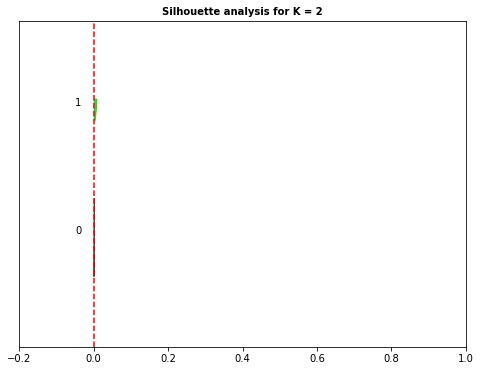

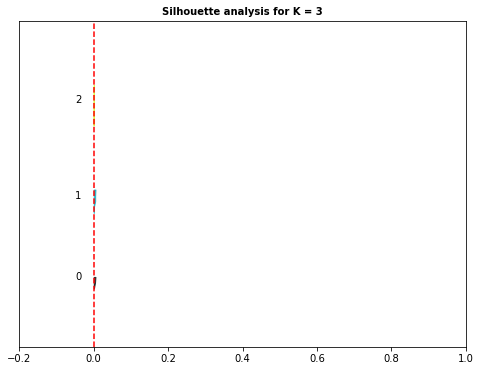

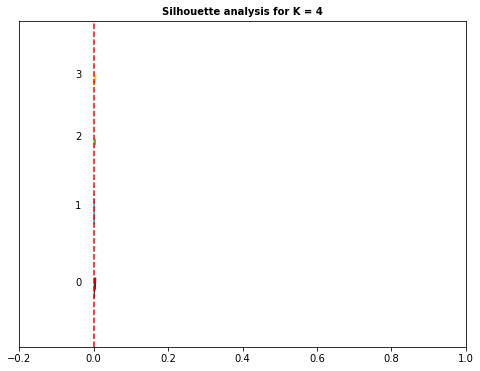

In [136]:
silhouette(kmeans_results, final_df, plot=True)

In [137]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

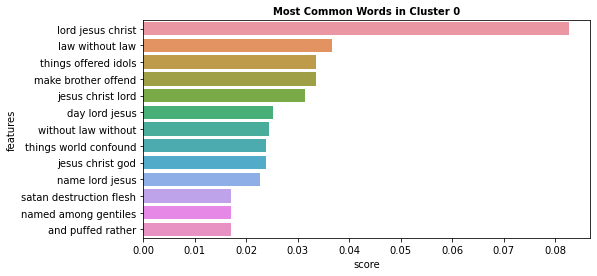

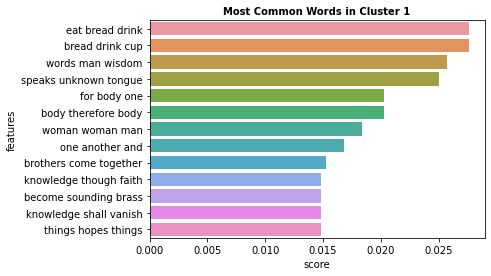

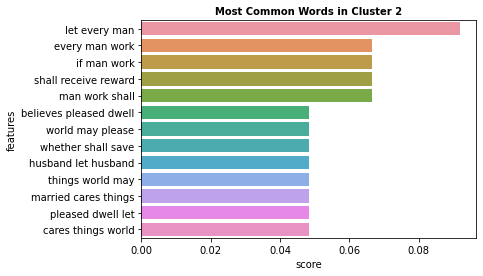

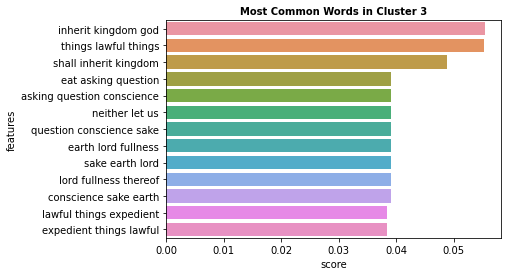

In [138]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [139]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

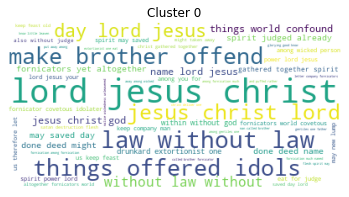

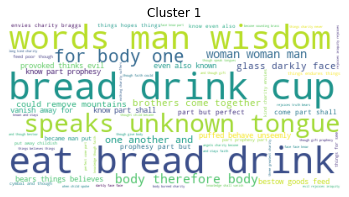

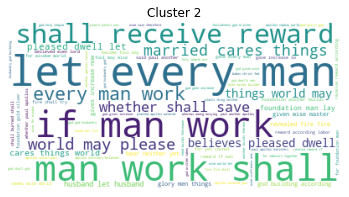

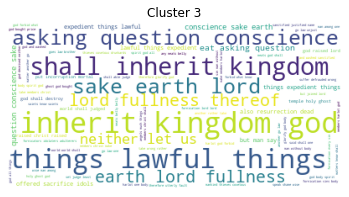

In [140]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [141]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,I_Corintios,"'paul', 'called', 'apostle', 'jesus', 'christ'...",0
101,I_Corintios_2,"',', 'brothers', ',', 'came', ',', 'came', 'ex...",1
102,I_Corintios_3,"',', 'brothers', ',', 'could', 'speak', 'spiri...",2
103,I_Corintios_4,"'let', 'man', 'account', 'us', ',', 'ministers...",1
104,I_Corintios_5,"'reported', 'commonly', 'fornication', 'among'...",0


In [142]:
print(df)

              Autor                                              Livro  label
100     I_Corintios  'paul', 'called', 'apostle', 'jesus', 'christ'...      0
101   I_Corintios_2  ',', 'brothers', ',', 'came', ',', 'came', 'ex...      1
102   I_Corintios_3  ',', 'brothers', ',', 'could', 'speak', 'spiri...      2
103   I_Corintios_4  'let', 'man', 'account', 'us', ',', 'ministers...      1
104   I_Corintios_5  'reported', 'commonly', 'fornication', 'among'...      0
105   I_Corintios_6  'dare', ',', 'matter', 'another', ',', 'go', '...      3
106   I_Corintios_7  'concerning', 'things', 'whereof', 'wrote', ':...      2
107   I_Corintios_8  'touching', 'things', 'offered', 'idols', ',',...      0
108   I_Corintios_9  'apostle', '?', 'free', '?', 'seen', 'jesus', ...      0
109  I_Corintios_10  'moreover', ',', 'brothers', ',', 'would', 'ig...      3
110  I_Corintios_11  'followers', ',', 'even', 'also', 'christ.now'...      1
111  I_Corintios_12  'concerning', 'spiritual', 'gifts', ',', 'b